In [ ]:
# NOTE: This implementation does not make much sense. Look
# at another person's implementation using various regression
# algorithms for more detail at a later date. 
# 
# https://github.com/ofnt/ml-projects/blob/master/Computer%20Hardware/Computer%20Hardware.ipynb 

In [1]:
# Harness wide constants

data_folder = "./data"
dataset_name = "machine.data"

In [2]:
# General imports

import numpy as np
import pandas as pd

In [251]:
# Read in the data

data_names = ["vendor_name","model_name", "myct", 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp', 'erp']
data_delimiter = ","

data = pd.read_csv(data_folder + "/" + dataset_name, delimiter=data_delimiter, names=data_names)

data

,vendor_name,model_name,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [43]:
#
# 2. Data Preprocessing
#

# 
# Data Analysis
#

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

graph_bounds = [0,20,100,200,300,400,500,600,1000]
graph_colors = ["red", "blue", "yellow","purple","green","cyan","brown", "black"]
graph_cmap = ListedColormap(graph_colors)
graph_norm = BoundaryNorm(graph_bounds, len(graph_colors))

def generate_graph(dataset_name, dataset_variable, dataset_solution, data, data_colors):
    fig, ax = plt.subplots()
    ax.title.set_text(dataset_name + " dataset - " + dataset_variable)
    sc = ax.scatter(data.index, data[dataset_variable], c=data[dataset_solution], cmap=graph_cmap, norm=graph_norm)
    fig.colorbar(sc, spacing="proportional")   

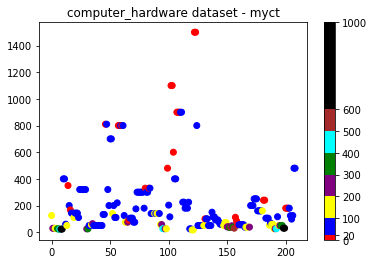

In [44]:
generate_graph("computer_hardware", "myct", "prp", data, data_colors)

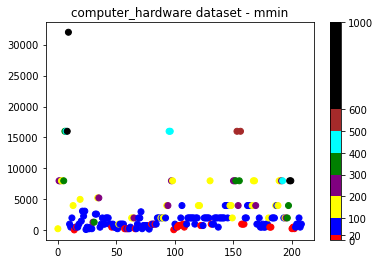

In [45]:
generate_graph("computer_hardware", "mmin", "prp", data, data_colors)

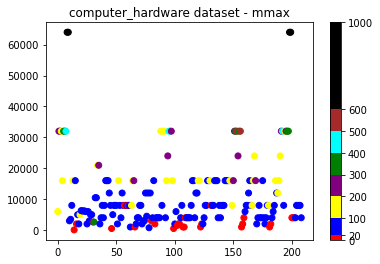

In [46]:
generate_graph("computer_hardware", "mmax", "prp", data, data_colors)

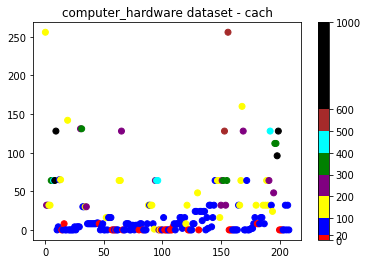

In [47]:
generate_graph("computer_hardware", "cach", "prp", data, data_colors)

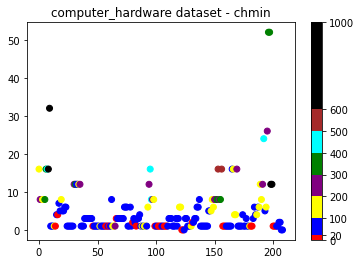

In [48]:
generate_graph("computer_hardware", "chmin", "prp", data, data_colors)

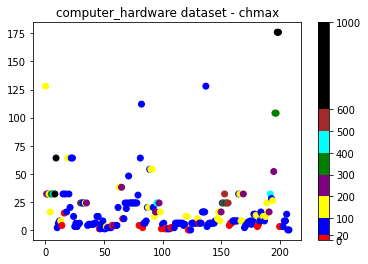

In [49]:
generate_graph("computer_hardware", "chmax", "prp", data, data_colors)

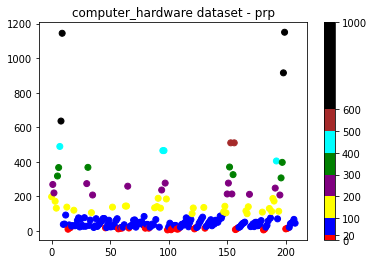

In [50]:
generate_graph("computer_hardware", "prp", "prp", data, data_colors)

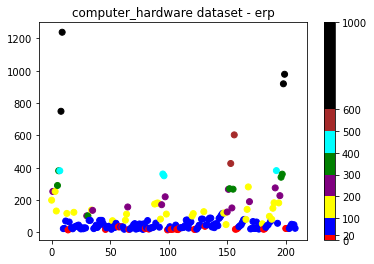

In [51]:
generate_graph("computer_hardware", "erp", "prp", data, data_colors)

In [252]:
#
# Data Preprocessing
#

data_numpy = data.to_numpy()

X = data_numpy[:,2:8].astype("int") # Ignore 0, 1, 8, and 9
Y = data_numpy[:,8].astype("int")

In [309]:
# Scale BOTH X and Y (having large Y can cause gradient 
# descent pains)

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler_X = MinMaxScaler(feature_range=(0,1))
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Y has a single column, so we need to transform it
# to allow the scaler to work on it. 
#scaler_Y = MinMaxScaler(feature_range=(0,1))
scaler_Y = StandardScaler()
Y = Y.reshape(-1, 1)
Y_scaled = scaler_Y.fit_transform(Y)

Y_scaled

array([[ 5.75759277e-01],
       [ 1.01827712e+00],
       [ 7.12877481e-01],
       [ 4.13710491e-01],
       [ 1.64404666e-01],
       [ 1.32367675e+00],
       [ 1.62907639e+00],
       [ 2.38945915e+00],
       [ 3.30565806e+00],
       [ 6.47184203e+00],
       [-4.21464022e-01],
       [-4.08998730e-01],
       [-8.49011583e-02],
       [ 2.01800540e-01],
       [-5.95978099e-01],
       [-4.40161958e-01],
       [-5.39884288e-01],
       [-4.83790478e-01],
       [-4.65092541e-01],
       [ 8.96129191e-02],
       [-4.71325187e-01],
       [-4.52627250e-01],
       [-2.78113172e-01],
       [-1.84623488e-01],
       [-5.14953706e-01],
       [-2.28252007e-01],
       [-4.52627250e-01],
       [-4.90023123e-01],
       [-1.78390843e-01],
       [-4.90023123e-01],
       [ 1.04944034e+00],
       [ 1.63530903e+00],
       [-4.58859895e-01],
       [-2.65647881e-01],
       [ 2.35588040e-03],
       [ 6.38085733e-01],
       [-5.33651643e-01],
       [-4.77557832e-01],
       [-2.1

In [291]:
#
# 3. Train Models
#

# Unlike previous notebooks, use a different "style" as seen in this
# intro to regression w/ keras
# https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_scaled_rows, X_scaled_cols = X_scaled.shape

def baseline_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim=X_scaled_cols, activation="relu"))
    model.add(Dense(6, activation="relu"))
    model.add(Dense(1))
    
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=['mse'])
    
    return model

In [301]:
#test_model = baseline_model()

#test_model.fit(X, Y, epochs = 5000, batch_size = 32)

In [305]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline

estimator = KerasRegressor(build_fn = baseline_model, epochs= 2000, batch_size=32)

estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = baseline_model, epochs=2000, batch_size=32)))

pipeline = Pipeline(estimators)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10)


In [307]:
result = cross_val_score(pipeline, X_scaled, Y_scaled, cv=kfold)
#result = cross_val_score(pipeline, X, Y, cv=kfold)

Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 0.7207 - mse: 0.7207
Epoch 2/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.6232 - mse: 0.6232
Epoch 3/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.5420 - mse: 0.5420
Epoch 4/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.4754 - mse: 0.4754
Epoch 5/2000
188/188 [==============================] - 0s 153us/sample - loss: 0.4262 - mse: 0.4262
Epoch 6/2000
188/188 [==============================] - 0s 162us/sample - loss: 0.3809 - mse: 0.3809
Epoch 7/2000
188/188 [==============================] - 0s 145us/sample - loss: 0.3529 - mse: 0.3529
Epoch 8/2000
188/188 [==============================] - 0s 167us/sample - loss: 0.3230 - mse: 0.3230
Epoch 9/2000
188/188 [==============================] - 0s 165us/sample - loss: 0.2994 - mse: 0.2994
Epoch 10/2000
188/188 [==============================] - 0s 119us/sample

188/188 [==============================] - 0s 106us/sample - loss: 0.0349 - mse: 0.0349
Epoch 82/2000
188/188 [==============================] - 0s 180us/sample - loss: 0.0349 - mse: 0.0349
Epoch 83/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0345 - mse: 0.0345
Epoch 84/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0342 - mse: 0.0342
Epoch 85/2000
188/188 [==============================] - 0s 97us/sample - loss: 0.0342 - mse: 0.0342
Epoch 86/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0336 - mse: 0.0336
Epoch 87/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0338 - mse: 0.0338
Epoch 88/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0335 - mse: 0.0335
Epoch 89/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0331 - mse: 0.0331
Epoch 90/2000
188/188 [==============================] - 0s 97us/sample - loss: 0.0329 - mse: 0.0

Epoch 161/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0263 - mse: 0.0263
Epoch 162/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0264 - mse: 0.0264
Epoch 163/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0261 - mse: 0.0261
Epoch 164/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0261 - mse: 0.0261
Epoch 165/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0260 - mse: 0.0260
Epoch 166/2000
188/188 [==============================] - 0s 141us/sample - loss: 0.0258 - mse: 0.0258
Epoch 167/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0258 - mse: 0.0258
Epoch 168/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0258 - mse: 0.0258
Epoch 169/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0256 - mse: 0.0256
Epoch 170/2000
188/188 [==============================] - 0s 110us/sample

188/188 [==============================] - 0s 122us/sample - loss: 0.0216 - mse: 0.0216
Epoch 241/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0216 - mse: 0.0216
Epoch 242/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0213 - mse: 0.0213
Epoch 243/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0215 - mse: 0.0215
Epoch 244/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0215 - mse: 0.0215
Epoch 245/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0213 - mse: 0.0213
Epoch 246/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0216 - mse: 0.0216
Epoch 247/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0211 - mse: 0.0211
Epoch 248/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0212 - mse: 0.0212
Epoch 249/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0212

188/188 [==============================] - 0s 126us/sample - loss: 0.0188 - mse: 0.0188
Epoch 320/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0186 - mse: 0.0186
Epoch 321/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0184 - mse: 0.0184
Epoch 322/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0183 - mse: 0.0183
Epoch 323/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0184 - mse: 0.0184
Epoch 324/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0184 - mse: 0.0184
Epoch 325/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0183 - mse: 0.0183
Epoch 326/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0183 - mse: 0.0183
Epoch 327/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0184 - mse: 0.0184
Epoch 328/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0184

188/188 [==============================] - 0s 137us/sample - loss: 0.0162 - mse: 0.0162
Epoch 399/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0163 - mse: 0.0163
Epoch 400/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0162 - mse: 0.0162
Epoch 401/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0161 - mse: 0.0161
Epoch 402/2000
188/188 [==============================] - 0s 233us/sample - loss: 0.0162 - mse: 0.0162
Epoch 403/2000
188/188 [==============================] - 0s 249us/sample - loss: 0.0162 - mse: 0.0162
Epoch 404/2000
188/188 [==============================] - 0s 219us/sample - loss: 0.0161 - mse: 0.0161
Epoch 405/2000
188/188 [==============================] - 0s 189us/sample - loss: 0.0160 - mse: 0.0160
Epoch 406/2000
188/188 [==============================] - 0s 202us/sample - loss: 0.0160 - mse: 0.0160
Epoch 407/2000
188/188 [==============================] - 0s 194us/sample - loss: 0.0160

188/188 [==============================] - 0s 116us/sample - loss: 0.0144 - mse: 0.0144
Epoch 478/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0144 - mse: 0.0144
Epoch 479/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0144 - mse: 0.0144
Epoch 480/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0144 - mse: 0.0144
Epoch 481/2000
188/188 [==============================] - 0s 97us/sample - loss: 0.0144 - mse: 0.0144
Epoch 482/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0143 - mse: 0.0143
Epoch 483/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0143 - mse: 0.0143
Epoch 484/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0144 - mse: 0.0144
Epoch 485/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0144 - mse: 0.0144
Epoch 486/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0144 

188/188 [==============================] - 0s 108us/sample - loss: 0.0131 - mse: 0.0131
Epoch 557/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0132 - mse: 0.0132
Epoch 558/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0131 - mse: 0.0131
Epoch 559/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0132 - mse: 0.0132
Epoch 560/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0130 - mse: 0.0130
Epoch 561/2000
188/188 [==============================] - 0s 98us/sample - loss: 0.0131 - mse: 0.0131
Epoch 562/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0132 - mse: 0.0132
Epoch 563/2000
188/188 [==============================] - 0s 97us/sample - loss: 0.0131 - mse: 0.0131
Epoch 564/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0131 - mse: 0.0131
Epoch 565/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0130 -

188/188 [==============================] - 0s 104us/sample - loss: 0.0122 - mse: 0.0122
Epoch 636/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0122 - mse: 0.0122
Epoch 637/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0123 - mse: 0.0123
Epoch 638/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0122 - mse: 0.0122
Epoch 639/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0122 - mse: 0.0122
Epoch 640/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0122 - mse: 0.0122
Epoch 641/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0122 - mse: 0.0122
Epoch 642/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0123 - mse: 0.0123
Epoch 643/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0122 - mse: 0.0122
Epoch 644/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0123

188/188 [==============================] - 0s 115us/sample - loss: 0.0115 - mse: 0.0115
Epoch 715/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0114 - mse: 0.0114
Epoch 716/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0114 - mse: 0.0114
Epoch 717/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0115 - mse: 0.0115
Epoch 718/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0115 - mse: 0.0115
Epoch 719/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0114 - mse: 0.0114
Epoch 720/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0115 - mse: 0.0115
Epoch 721/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0113 - mse: 0.0113
Epoch 722/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0114 - mse: 0.0114
Epoch 723/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0115

188/188 [==============================] - 0s 106us/sample - loss: 0.0110 - mse: 0.0110
Epoch 794/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0110 - mse: 0.0110
Epoch 795/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0109 - mse: 0.0109
Epoch 796/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0111 - mse: 0.0111
Epoch 797/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0110 - mse: 0.0110
Epoch 798/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0110 - mse: 0.0110
Epoch 799/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0109 - mse: 0.0109
Epoch 800/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0110 - mse: 0.0110
Epoch 801/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0109 - mse: 0.0109
Epoch 802/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0109 

188/188 [==============================] - 0s 151us/sample - loss: 0.0104 - mse: 0.0104
Epoch 873/2000
188/188 [==============================] - 0s 225us/sample - loss: 0.0104 - mse: 0.0104
Epoch 874/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0105 - mse: 0.0105
Epoch 875/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0105 - mse: 0.0105
Epoch 876/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0106 - mse: 0.0106
Epoch 877/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0106 - mse: 0.0106
Epoch 878/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0104 - mse: 0.0104
Epoch 879/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0105 - mse: 0.0105
Epoch 880/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0104 - mse: 0.0104
Epoch 881/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0106

188/188 [==============================] - 0s 149us/sample - loss: 0.0102 - mse: 0.0102
Epoch 952/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0102 - mse: 0.0102
Epoch 953/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0104 - mse: 0.0104
Epoch 954/2000
188/188 [==============================] - 0s 182us/sample - loss: 0.0102 - mse: 0.0102
Epoch 955/2000
188/188 [==============================] - 0s 176us/sample - loss: 0.0102 - mse: 0.0102
Epoch 956/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0103 - mse: 0.0103
Epoch 957/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0104 - mse: 0.0104
Epoch 958/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0102 - mse: 0.0102
Epoch 959/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0103 - mse: 0.0103
Epoch 960/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0103

188/188 [==============================] - 0s 104us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1031/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1032/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1033/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1034/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1035/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1036/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1037/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1038/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1039/2000
188/188 [==============================] - 0s 109us/sample - los

Epoch 1109/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1110/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1111/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1112/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1113/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1114/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1115/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1116/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1117/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1118/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 104us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1188/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1189/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1190/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1191/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1192/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1193/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1194/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1195/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1196/2000
188/188 [==============================] - 0s 97us/sample - loss

188/188 [==============================] - 0s 108us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1267/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1268/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1269/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1270/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1271/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1272/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1273/2000
188/188 [==============================] - 0s 98us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1274/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1275/2000
188/188 [==============================] - 0s 100us/sample - loss:

188/188 [==============================] - 0s 104us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1346/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1347/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1348/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1349/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1350/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1351/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1352/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1353/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1354/2000
188/188 [==============================] - 0s 97us/sample - loss

Epoch 1424/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1425/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1426/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1427/2000
188/188 [==============================] - 0s 98us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1428/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1429/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1430/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1431/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1432/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1433/2000
188/188 [==============================] - 0s 109u

188/188 [==============================] - 0s 106us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1503/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1504/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1505/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1506/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1507/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1508/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1509/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1510/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1511/2000
188/188 [==============================] - 0s 132us/sample - los

Epoch 1581/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1582/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1583/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1584/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1585/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1586/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1587/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1588/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1589/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1590/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 109us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1660/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1661/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1662/2000
188/188 [==============================] - 0s 97us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1663/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1664/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1665/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1666/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1667/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1668/2000
188/188 [==============================] - 0s 100us/sample - loss:

Epoch 1738/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1739/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1740/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1741/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1742/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1743/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1744/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1745/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1746/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1747/2000
188/188 [==============================] - 0s 105

188/188 [==============================] - 0s 105us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1817/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1818/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1819/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1820/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1821/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1822/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1823/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1824/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1825/2000
188/188 [==============================] - 0s 114us/sample - los

Epoch 1895/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1896/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1897/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1898/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1899/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1900/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1901/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1902/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1903/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1904/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 108us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1974/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1975/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1976/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1977/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1978/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1979/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1980/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1981/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1982/2000
188/188 [==============================] - 0s 96us/sample - loss

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 1.1504 - mse: 1.1504
Epoch 2/2000
188/188 [==============================] - 0s 104us/sample - loss: 1.1061 - mse: 1.1061
Epoch 3/2000
188/188 [==============================] - 0s 113us/sample - loss: 1.0697 - mse: 1.0697
Epoch 4/2000
188/188 [==============================] - 0s 102us/sample - loss: 1.0390 - mse: 1.0390
Epoch 5/2000
188/188 [==============================] - 0s 104us/sample - loss: 1.0098 - mse: 1.0098
Epoch 6/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.9847 - mse: 0.9847
Epoch 7/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.9623 - mse: 0.9623
Epoch 8/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.9366 - mse: 0.9366
Epoch 9/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.9156 - mse: 0.9156
Epoch 10/2000
188/188 [==============================] - 0s 105us/sample

188/188 [==============================] - 0s 118us/sample - loss: 0.0357 - mse: 0.0357
Epoch 82/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0354 - mse: 0.0354
Epoch 83/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0352 - mse: 0.0352
Epoch 84/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0348 - mse: 0.0348
Epoch 85/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0345 - mse: 0.0345
Epoch 86/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0343 - mse: 0.0343
Epoch 87/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0342 - mse: 0.0342
Epoch 88/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0340 - mse: 0.0340
Epoch 89/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0338 - mse: 0.0338
Epoch 90/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0334 - mse: 0

188/188 [==============================] - 0s 112us/sample - loss: 0.0248 - mse: 0.0248
Epoch 161/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0245 - mse: 0.0245
Epoch 162/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0244 - mse: 0.0244
Epoch 163/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0243 - mse: 0.0243
Epoch 164/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0242 - mse: 0.0242
Epoch 165/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0241 - mse: 0.0241
Epoch 166/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0242 - mse: 0.0242
Epoch 167/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0240 - mse: 0.0240
Epoch 168/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0242 - mse: 0.0242
Epoch 169/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0239 -

188/188 [==============================] - 0s 106us/sample - loss: 0.0198 - mse: 0.0198
Epoch 240/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0198 - mse: 0.0198
Epoch 241/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0198 - mse: 0.0198
Epoch 242/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0198 - mse: 0.0198
Epoch 243/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0198 - mse: 0.0198
Epoch 244/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0196 - mse: 0.0196
Epoch 245/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0196 - mse: 0.0196
Epoch 246/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0196 - mse: 0.0196
Epoch 247/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0196 - mse: 0.0196
Epoch 248/2000
188/188 [==============================] - 0s 98us/sample - loss: 0.0199 

188/188 [==============================] - 0s 127us/sample - loss: 0.0175 - mse: 0.0175
Epoch 319/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0176 - mse: 0.0176
Epoch 320/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0174 - mse: 0.0174
Epoch 321/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0173 - mse: 0.0173
Epoch 322/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0174 - mse: 0.0174
Epoch 323/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0173 - mse: 0.0173
Epoch 324/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0174 - mse: 0.0174
Epoch 325/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0174 - mse: 0.0174
Epoch 326/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0172 - mse: 0.0172
Epoch 327/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0172 

188/188 [==============================] - 0s 107us/sample - loss: 0.0159 - mse: 0.0159
Epoch 398/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0159 - mse: 0.0159
Epoch 399/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0157 - mse: 0.0157
Epoch 400/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0157 - mse: 0.0157
Epoch 401/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0158 - mse: 0.0158
Epoch 402/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0157 - mse: 0.0157
Epoch 403/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0157 - mse: 0.0157
Epoch 404/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0157 - mse: 0.0157
Epoch 405/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0156 - mse: 0.0156
Epoch 406/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0157

188/188 [==============================] - 0s 106us/sample - loss: 0.0145 - mse: 0.0145
Epoch 477/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0144 - mse: 0.0144
Epoch 478/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0145 - mse: 0.0145
Epoch 479/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0144 - mse: 0.0144
Epoch 480/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0145 - mse: 0.0145
Epoch 481/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0144 - mse: 0.0144
Epoch 482/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0144 - mse: 0.0144
Epoch 483/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0143 - mse: 0.0143
Epoch 484/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0143 - mse: 0.0143
Epoch 485/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0143

188/188 [==============================] - 0s 119us/sample - loss: 0.0134 - mse: 0.0134
Epoch 556/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0133 - mse: 0.0133
Epoch 557/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0133 - mse: 0.0133
Epoch 558/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0133 - mse: 0.0133
Epoch 559/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0136 - mse: 0.0136
Epoch 560/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0133 - mse: 0.0133
Epoch 561/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0132 - mse: 0.0132
Epoch 562/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0133 - mse: 0.0133
Epoch 563/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0134 - mse: 0.0134
Epoch 564/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0132

188/188 [==============================] - 0s 111us/sample - loss: 0.0122 - mse: 0.0122
Epoch 635/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0124 - mse: 0.0124
Epoch 636/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0122 - mse: 0.0122
Epoch 637/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0121 - mse: 0.0121
Epoch 638/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0124 - mse: 0.0124
Epoch 639/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0121 - mse: 0.0121
Epoch 640/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0121 - mse: 0.0121
Epoch 641/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0120 - mse: 0.0120
Epoch 642/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0121 - mse: 0.0121
Epoch 643/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0120

188/188 [==============================] - 0s 112us/sample - loss: 0.0114 - mse: 0.0114
Epoch 714/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0113 - mse: 0.0113
Epoch 715/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0113 - mse: 0.0113
Epoch 716/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0115 - mse: 0.0115
Epoch 717/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0113 - mse: 0.0113
Epoch 718/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0114 - mse: 0.0114
Epoch 719/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0114 - mse: 0.0114
Epoch 720/2000
188/188 [==============================] - 0s 143us/sample - loss: 0.0113 - mse: 0.0113
Epoch 721/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0114 - mse: 0.0114
Epoch 722/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0113

188/188 [==============================] - 0s 135us/sample - loss: 0.0109 - mse: 0.0109
Epoch 793/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0108 - mse: 0.0108
Epoch 794/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0107 - mse: 0.0107
Epoch 795/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0108 - mse: 0.0108
Epoch 796/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0107 - mse: 0.0107
Epoch 797/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0110 - mse: 0.0110
Epoch 798/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0107 - mse: 0.0107
Epoch 799/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0108 - mse: 0.0108
Epoch 800/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0108 - mse: 0.0108
Epoch 801/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0108

188/188 [==============================] - 0s 111us/sample - loss: 0.0103 - mse: 0.0103
Epoch 872/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0104 - mse: 0.0104
Epoch 873/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0103 - mse: 0.0103
Epoch 874/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0103 - mse: 0.0103
Epoch 875/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0104 - mse: 0.0104
Epoch 876/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0103 - mse: 0.0103
Epoch 877/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0103 - mse: 0.0103
Epoch 878/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0103 - mse: 0.0103
Epoch 879/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0104 - mse: 0.0104
Epoch 880/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0104

188/188 [==============================] - 0s 112us/sample - loss: 0.0100 - mse: 0.0100
Epoch 951/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0099 - mse: 0.0099
Epoch 952/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0101 - mse: 0.0101
Epoch 953/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0100 - mse: 0.0100
Epoch 954/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0102 - mse: 0.0102
Epoch 955/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0101 - mse: 0.0101
Epoch 956/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0100 - mse: 0.0100
Epoch 957/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0100 - mse: 0.0100
Epoch 958/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0101 - mse: 0.0101
Epoch 959/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0101

188/188 [==============================] - 0s 106us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1030/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1031/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1032/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1033/2000
188/188 [==============================] - 0s 148us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1034/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1035/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1036/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1037/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1038/2000
188/188 [==============================] - 0s 117us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1109/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1110/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1111/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1112/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1113/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1114/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1115/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1116/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1117/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 113us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1187/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1188/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1189/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1190/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1191/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1192/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1193/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1194/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1195/2000
188/188 [==============================] - 0s 127us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1266/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1267/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1268/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1269/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1270/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1271/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1272/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1273/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1274/2000
188/188 [==============================] - 0s 13

188/188 [==============================] - 0s 132us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1344/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1345/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1346/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1347/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1348/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1349/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1350/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1351/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1352/2000
188/188 [==============================] - 0s 114us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1423/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1424/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1425/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1426/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1427/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1428/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1429/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1430/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1431/2000
188/188 [==============================] - 0s 100

188/188 [==============================] - 0s 104us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1501/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1502/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1503/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1504/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0089 - mse: 0.0089
Epoch 1505/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1506/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1507/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1508/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1509/2000
188/188 [==============================] - 0s 115us/sample - loss

Epoch 1579/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1580/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1581/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1582/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1583/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0084 - mse: 0.0084
Epoch 1584/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0085 - mse: 0.0085
Epoch 1585/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1586/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1587/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0086 - mse: 0.0086
Epoch 1588/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 103us/sample - loss: 0.0082 - mse: 0.0082
Epoch 1658/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1659/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1660/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1661/2000
188/188 [==============================] - 0s 98us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1662/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1663/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0085 - mse: 0.0085
Epoch 1664/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0085 - mse: 0.0085
Epoch 1665/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0082 - mse: 0.0082
Epoch 1666/2000
188/188 [==============================] - 0s 105us/sample - loss

Epoch 1736/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1737/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0084 - mse: 0.0084
Epoch 1738/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0081 - mse: 0.0081
Epoch 1739/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0082 - mse: 0.0082
Epoch 1740/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0081 - mse: 0.0081
Epoch 1741/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0082 - mse: 0.0082
Epoch 1742/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0081 - mse: 0.0081
Epoch 1743/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0082 - mse: 0.0082
Epoch 1744/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0082 - mse: 0.0082
Epoch 1745/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 106us/sample - loss: 0.0081 - mse: 0.0081
Epoch 1815/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1816/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1817/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0080 - mse: 0.0080
Epoch 1818/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0087 - mse: 0.0087
Epoch 1819/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1820/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1821/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1822/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0088 - mse: 0.0088
Epoch 1823/2000
188/188 [==============================] - 0s 108us/sample - loss

Epoch 1893/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0079 - mse: 0.0079
Epoch 1894/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0078 - mse: 0.0078
Epoch 1895/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0078 - mse: 0.0078
Epoch 1896/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0078 - mse: 0.0078
Epoch 1897/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0079 - mse: 0.0079
Epoch 1898/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0079 - mse: 0.0079
Epoch 1899/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0079 - mse: 0.0079
Epoch 1900/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0078 - mse: 0.0078
Epoch 1901/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0080 - mse: 0.0080
Epoch 1902/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 124us/sample - loss: 0.0078 - mse: 0.0078
Epoch 1972/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0077 - mse: 0.0077
Epoch 1973/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0080 - mse: 0.0080
Epoch 1974/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0077 - mse: 0.0077
Epoch 1975/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0080 - mse: 0.0080
Epoch 1976/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0078 - mse: 0.0078
Epoch 1977/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0081 - mse: 0.0081
Epoch 1978/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0081 - mse: 0.0081
Epoch 1979/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0083 - mse: 0.0083
Epoch 1980/2000
188/188 [==============================] - 0s 100us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 0.8826 - mse: 0.8826
Epoch 2/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.7696 - mse: 0.7696
Epoch 3/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.6756 - mse: 0.6756
Epoch 4/2000
188/188 [==============================] - 0s 98us/sample - loss: 0.5907 - mse: 0.5907
Epoch 5/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.5142 - mse: 0.5142
Epoch 6/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.4444 - mse: 0.4444
Epoch 7/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.3787 - mse: 0.3787
Epoch 8/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.3399 - mse: 0.3399
Epoch 9/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.2943 - mse: 0.2943
Epoch 10/2000
188/188 [==============================] - 0s 122us/sample 

188/188 [==============================] - 0s 101us/sample - loss: 0.0501 - mse: 0.0501
Epoch 82/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0495 - mse: 0.0495
Epoch 83/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0490 - mse: 0.0490
Epoch 84/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0486 - mse: 0.0486
Epoch 85/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0483 - mse: 0.0483
Epoch 86/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0480 - mse: 0.0480
Epoch 87/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0479 - mse: 0.0479
Epoch 88/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0473 - mse: 0.0473
Epoch 89/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0471 - mse: 0.0471
Epoch 90/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0468 - mse: 0

188/188 [==============================] - 0s 104us/sample - loss: 0.0345 - mse: 0.0345
Epoch 161/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0344 - mse: 0.0344
Epoch 162/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0342 - mse: 0.0342
Epoch 163/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0341 - mse: 0.0341
Epoch 164/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0340 - mse: 0.0340
Epoch 165/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0337 - mse: 0.0337
Epoch 166/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0336 - mse: 0.0336
Epoch 167/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0338 - mse: 0.0338
Epoch 168/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0334 - mse: 0.0334
Epoch 169/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0333 

188/188 [==============================] - 0s 123us/sample - loss: 0.0261 - mse: 0.0261
Epoch 240/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0260 - mse: 0.0260
Epoch 241/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0260 - mse: 0.0260
Epoch 242/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0259 - mse: 0.0259
Epoch 243/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0257 - mse: 0.0257
Epoch 244/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0257 - mse: 0.0257
Epoch 245/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0258 - mse: 0.0258
Epoch 246/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0256 - mse: 0.0256
Epoch 247/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0254 - mse: 0.0254
Epoch 248/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0254

188/188 [==============================] - 0s 121us/sample - loss: 0.0216 - mse: 0.0216
Epoch 319/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0215 - mse: 0.0215
Epoch 320/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0215 - mse: 0.0215
Epoch 321/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0216 - mse: 0.0216
Epoch 322/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0213 - mse: 0.0213
Epoch 323/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0214 - mse: 0.0214
Epoch 324/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0215 - mse: 0.0215
Epoch 325/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0213 - mse: 0.0213
Epoch 326/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0213 - mse: 0.0213
Epoch 327/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0211

188/188 [==============================] - 0s 143us/sample - loss: 0.0190 - mse: 0.0190
Epoch 398/2000
188/188 [==============================] - 0s 148us/sample - loss: 0.0188 - mse: 0.0188
Epoch 399/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0188 - mse: 0.0188
Epoch 400/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0188 - mse: 0.0188
Epoch 401/2000
188/188 [==============================] - 0s 147us/sample - loss: 0.0188 - mse: 0.0188
Epoch 402/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0187 - mse: 0.0187
Epoch 403/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0186 - mse: 0.0186
Epoch 404/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0188 - mse: 0.0188
Epoch 405/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0188 - mse: 0.0188
Epoch 406/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0187

188/188 [==============================] - 0s 107us/sample - loss: 0.0169 - mse: 0.0169
Epoch 477/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0170 - mse: 0.0170
Epoch 478/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0168 - mse: 0.0168
Epoch 479/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0169 - mse: 0.0169
Epoch 480/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0169 - mse: 0.0169
Epoch 481/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0169 - mse: 0.0169
Epoch 482/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0170 - mse: 0.0170
Epoch 483/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0170 - mse: 0.0170
Epoch 484/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0170 - mse: 0.0170
Epoch 485/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0169

188/188 [==============================] - 0s 116us/sample - loss: 0.0155 - mse: 0.0155
Epoch 556/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0154 - mse: 0.0154
Epoch 557/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0155 - mse: 0.0155
Epoch 558/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0152 - mse: 0.0152
Epoch 559/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0153 - mse: 0.0153
Epoch 560/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0154 - mse: 0.0154
Epoch 561/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0154 - mse: 0.0154
Epoch 562/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0153 - mse: 0.0153
Epoch 563/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0158 - mse: 0.0158
Epoch 564/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0149

188/188 [==============================] - 0s 248us/sample - loss: 0.0144 - mse: 0.0144
Epoch 635/2000
188/188 [==============================] - 0s 171us/sample - loss: 0.0145 - mse: 0.0145
Epoch 636/2000
188/188 [==============================] - 0s 200us/sample - loss: 0.0141 - mse: 0.0141
Epoch 637/2000
188/188 [==============================] - 0s 233us/sample - loss: 0.0141 - mse: 0.0141
Epoch 638/2000
188/188 [==============================] - 0s 281us/sample - loss: 0.0142 - mse: 0.0142
Epoch 639/2000
188/188 [==============================] - 0s 145us/sample - loss: 0.0141 - mse: 0.0141
Epoch 640/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0141 - mse: 0.0141
Epoch 641/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0140 - mse: 0.0140
Epoch 642/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0142 - mse: 0.0142
Epoch 643/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0140

188/188 [==============================] - 0s 170us/sample - loss: 0.0133 - mse: 0.0133
Epoch 714/2000
188/188 [==============================] - 0s 163us/sample - loss: 0.0133 - mse: 0.0133
Epoch 715/2000
188/188 [==============================] - 0s 153us/sample - loss: 0.0133 - mse: 0.0133
Epoch 716/2000
188/188 [==============================] - 0s 167us/sample - loss: 0.0133 - mse: 0.0133
Epoch 717/2000
188/188 [==============================] - 0s 150us/sample - loss: 0.0134 - mse: 0.0134
Epoch 718/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0135 - mse: 0.0135
Epoch 719/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0135 - mse: 0.0135
Epoch 720/2000
188/188 [==============================] - 0s 141us/sample - loss: 0.0136 - mse: 0.0136
Epoch 721/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0134 - mse: 0.0134
Epoch 722/2000
188/188 [==============================] - 0s 153us/sample - loss: 0.0136

188/188 [==============================] - 0s 128us/sample - loss: 0.0128 - mse: 0.0128
Epoch 793/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0128 - mse: 0.0128
Epoch 794/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0128 - mse: 0.0128
Epoch 795/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0129 - mse: 0.0129
Epoch 796/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0128 - mse: 0.0128
Epoch 797/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0127 - mse: 0.0127
Epoch 798/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0128 - mse: 0.0128
Epoch 799/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0128 - mse: 0.0128
Epoch 800/2000
188/188 [==============================] - 0s 238us/sample - loss: 0.0127 - mse: 0.0127
Epoch 801/2000
188/188 [==============================] - 0s 238us/sample - loss: 0.0127

188/188 [==============================] - 0s 119us/sample - loss: 0.0122 - mse: 0.0122
Epoch 872/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0121 - mse: 0.0121
Epoch 873/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0121 - mse: 0.0121
Epoch 874/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0121 - mse: 0.0121
Epoch 875/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0120 - mse: 0.0120
Epoch 876/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0124 - mse: 0.0124
Epoch 877/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0123 - mse: 0.0123
Epoch 878/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0121 - mse: 0.0121
Epoch 879/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0120 - mse: 0.0120
Epoch 880/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0120

188/188 [==============================] - 0s 114us/sample - loss: 0.0121 - mse: 0.0121
Epoch 951/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 952/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0116 - mse: 0.0116
Epoch 953/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0117 - mse: 0.0117
Epoch 954/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0116 - mse: 0.0116
Epoch 955/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0117 - mse: 0.0117
Epoch 956/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0116 - mse: 0.0116
Epoch 957/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0117 - mse: 0.0117
Epoch 958/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0117 - mse: 0.0117
Epoch 959/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0117

188/188 [==============================] - 0s 115us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1030/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1031/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1032/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1033/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1034/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1035/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1036/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1037/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1038/2000
188/188 [==============================] - 0s 107us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1109/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1110/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1111/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1112/2000
188/188 [==============================] - 0s 178us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1113/2000
188/188 [==============================] - 0s 163us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1114/2000
188/188 [==============================] - 0s 143us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1115/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1116/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1117/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 131us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1187/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1188/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1189/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1190/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1191/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1192/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1193/2000
188/188 [==============================] - 0s 222us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1194/2000
188/188 [==============================] - 0s 138us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1195/2000
188/188 [==============================] - 0s 117us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1266/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1267/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1268/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1269/2000
188/188 [==============================] - 0s 158us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1270/2000
188/188 [==============================] - 0s 171us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1271/2000
188/188 [==============================] - 0s 170us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1272/2000
188/188 [==============================] - 0s 177us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1273/2000
188/188 [==============================] - 0s 179us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1274/2000
188/188 [==============================] - 0s 18

188/188 [==============================] - 0s 107us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1344/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1345/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1346/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1347/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1348/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1349/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1350/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1351/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1352/2000
188/188 [==============================] - 0s 122us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1423/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1424/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1425/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1426/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1427/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1428/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1429/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1430/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1431/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 118us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1501/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1502/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1503/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1504/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1505/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1506/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1507/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1508/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1509/2000
188/188 [==============================] - 0s 102us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1580/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1581/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1582/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1583/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1584/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1585/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1586/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1587/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1588/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 107us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1658/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1659/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1660/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1661/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1662/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1663/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1664/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1665/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1666/2000
188/188 [==============================] - 0s 113us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1737/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1738/2000
188/188 [==============================] - ETA: 0s - loss: 0.0046 - mse: 0.004 - 0s 139us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1739/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1740/2000
188/188 [==============================] - 0s 163us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1741/2000
188/188 [==============================] - 0s 151us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1742/2000
188/188 [==============================] - 0s 162us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1743/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1744/2000
188/188 [==============================] - 0s 147us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1745/2000
188/188 [=

188/188 [==============================] - 0s 130us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1815/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1816/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1817/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1818/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1819/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1820/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1821/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1822/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1823/2000
188/188 [==============================] - 0s 110us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1894/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1895/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1896/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1897/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1898/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0095 - mse: 0.0095
Epoch 1899/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1900/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0096 - mse: 0.0096
Epoch 1901/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0094 - mse: 0.0094
Epoch 1902/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 117us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1972/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1973/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1974/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1975/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0093 - mse: 0.0093
Epoch 1976/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0092 - mse: 0.0092
Epoch 1977/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0091 - mse: 0.0091
Epoch 1978/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1979/2000
188/188 [==============================] - 0s 145us/sample - loss: 0.0090 - mse: 0.0090
Epoch 1980/2000
188/188 [==============================] - 0s 133us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 0.8752 - mse: 0.8752
Epoch 2/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.8050 - mse: 0.8050
Epoch 3/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.7293 - mse: 0.7293
Epoch 4/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.6745 - mse: 0.6745
Epoch 5/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.6089 - mse: 0.6089
Epoch 6/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.5598 - mse: 0.5598
Epoch 7/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.5112 - mse: 0.5112
Epoch 8/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.4621 - mse: 0.4621
Epoch 9/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.4253 - mse: 0.4253
Epoch 10/2000
188/188 [==============================] - 0s 112us/sample

188/188 [==============================] - 0s 117us/sample - loss: 0.0586 - mse: 0.0586
Epoch 82/2000
188/188 [==============================] - 0s 187us/sample - loss: 0.0581 - mse: 0.0581
Epoch 83/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0580 - mse: 0.0580
Epoch 84/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0577 - mse: 0.0577
Epoch 85/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0573 - mse: 0.0573
Epoch 86/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0570 - mse: 0.0570
Epoch 87/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0568 - mse: 0.0568
Epoch 88/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0566 - mse: 0.0566
Epoch 89/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0563 - mse: 0.0563
Epoch 90/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0560 - mse: 0

188/188 [==============================] - 0s 111us/sample - loss: 0.0437 - mse: 0.0437
Epoch 161/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0434 - mse: 0.0434
Epoch 162/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0434 - mse: 0.0434
Epoch 163/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0435 - mse: 0.0435
Epoch 164/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0432 - mse: 0.0432
Epoch 165/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0431 - mse: 0.0431
Epoch 166/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0429 - mse: 0.0429
Epoch 167/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0425 - mse: 0.0425
Epoch 168/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0426 - mse: 0.0426
Epoch 169/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0425

188/188 [==============================] - 0s 117us/sample - loss: 0.0360 - mse: 0.0360
Epoch 240/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0360 - mse: 0.0360
Epoch 241/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0357 - mse: 0.0357
Epoch 242/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0355 - mse: 0.0355
Epoch 243/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0355 - mse: 0.0355
Epoch 244/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0353 - mse: 0.0353
Epoch 245/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0356 - mse: 0.0356
Epoch 246/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0352 - mse: 0.0352
Epoch 247/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0354 - mse: 0.0354
Epoch 248/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0351

188/188 [==============================] - 0s 124us/sample - loss: 0.0307 - mse: 0.0307
Epoch 319/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0302 - mse: 0.0302
Epoch 320/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0305 - mse: 0.0305
Epoch 321/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0301 - mse: 0.0301
Epoch 322/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0302 - mse: 0.0302
Epoch 323/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0301 - mse: 0.0301
Epoch 324/2000
188/188 [==============================] - 0s 159us/sample - loss: 0.0302 - mse: 0.0302
Epoch 325/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0302 - mse: 0.0302
Epoch 326/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0299 - mse: 0.0299
Epoch 327/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0297

188/188 [==============================] - 0s 111us/sample - loss: 0.0262 - mse: 0.0262
Epoch 398/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0263 - mse: 0.0263
Epoch 399/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0261 - mse: 0.0261
Epoch 400/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0263 - mse: 0.0263
Epoch 401/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0262 - mse: 0.0262
Epoch 402/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0260 - mse: 0.0260
Epoch 403/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0261 - mse: 0.0261
Epoch 404/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0259 - mse: 0.0259
Epoch 405/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0260 - mse: 0.0260
Epoch 406/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0258

188/188 [==============================] - 0s 111us/sample - loss: 0.0225 - mse: 0.0225
Epoch 477/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0227 - mse: 0.0227
Epoch 478/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0226 - mse: 0.0226
Epoch 479/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0223 - mse: 0.0223
Epoch 480/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0226 - mse: 0.0226
Epoch 481/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0226 - mse: 0.0226
Epoch 482/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0227 - mse: 0.0227
Epoch 483/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0222 - mse: 0.0222
Epoch 484/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0221 - mse: 0.0221
Epoch 485/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0222

188/188 [==============================] - 0s 119us/sample - loss: 0.0193 - mse: 0.0193
Epoch 556/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0194 - mse: 0.0194
Epoch 557/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0193 - mse: 0.0193
Epoch 558/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0193 - mse: 0.0193
Epoch 559/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0194 - mse: 0.0194
Epoch 560/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0193 - mse: 0.0193
Epoch 561/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0192 - mse: 0.0192
Epoch 562/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0191 - mse: 0.0191
Epoch 563/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0192 - mse: 0.0192
Epoch 564/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0190

188/188 [==============================] - 0s 138us/sample - loss: 0.0174 - mse: 0.0174
Epoch 635/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0173 - mse: 0.0173
Epoch 636/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0173 - mse: 0.0173
Epoch 637/2000
188/188 [==============================] - 0s 205us/sample - loss: 0.0175 - mse: 0.0175
Epoch 638/2000
188/188 [==============================] - 0s 421us/sample - loss: 0.0175 - mse: 0.0175
Epoch 639/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0173 - mse: 0.0173
Epoch 640/2000
188/188 [==============================] - 0s 148us/sample - loss: 0.0175 - mse: 0.0175
Epoch 641/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0173 - mse: 0.0173
Epoch 642/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0172 - mse: 0.0172
Epoch 643/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0173

188/188 [==============================] - 0s 121us/sample - loss: 0.0160 - mse: 0.0160
Epoch 714/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0160 - mse: 0.0160
Epoch 715/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0160 - mse: 0.0160
Epoch 716/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0159 - mse: 0.0159
Epoch 717/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0161 - mse: 0.0161
Epoch 718/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0161 - mse: 0.0161
Epoch 719/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0160 - mse: 0.0160
Epoch 720/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0171 - mse: 0.0171
Epoch 721/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0161 - mse: 0.0161
Epoch 722/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0164

188/188 [==============================] - 0s 109us/sample - loss: 0.0154 - mse: 0.0154
Epoch 793/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0154 - mse: 0.0154
Epoch 794/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0154 - mse: 0.0154
Epoch 795/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0155 - mse: 0.0155
Epoch 796/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0153 - mse: 0.0153
Epoch 797/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0155 - mse: 0.0155
Epoch 798/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0153 - mse: 0.0153
Epoch 799/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0153 - mse: 0.0153
Epoch 800/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0152 - mse: 0.0152
Epoch 801/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0152

188/188 [==============================] - 0s 135us/sample - loss: 0.0146 - mse: 0.0146
Epoch 872/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0146 - mse: 0.0146
Epoch 873/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0145 - mse: 0.0145
Epoch 874/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0148 - mse: 0.0148
Epoch 875/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0146 - mse: 0.0146
Epoch 876/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0146 - mse: 0.0146
Epoch 877/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0146 - mse: 0.0146
Epoch 878/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0145 - mse: 0.0145
Epoch 879/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0146 - mse: 0.0146
Epoch 880/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0147

188/188 [==============================] - 0s 109us/sample - loss: 0.0141 - mse: 0.0141
Epoch 951/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0142 - mse: 0.0142
Epoch 952/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0143 - mse: 0.0143
Epoch 953/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0143 - mse: 0.0143
Epoch 954/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0150 - mse: 0.0150
Epoch 955/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0144 - mse: 0.0144
Epoch 956/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0146 - mse: 0.0146
Epoch 957/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0149 - mse: 0.0149
Epoch 958/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0140 - mse: 0.0140
Epoch 959/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0150

188/188 [==============================] - 0s 166us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1030/2000
188/188 [==============================] - 0s 173us/sample - loss: 0.0139 - mse: 0.0139
Epoch 1031/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1032/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0137 - mse: 0.0137
Epoch 1033/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0141 - mse: 0.0141
Epoch 1034/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0141 - mse: 0.0141
Epoch 1035/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0139 - mse: 0.0139
Epoch 1036/2000
188/188 [==============================] - 0s 226us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1037/2000
188/188 [==============================] - 0s 152us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1038/2000
188/188 [==============================] - 0s 145us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1109/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1110/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1111/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1112/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1113/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1114/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1115/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1116/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1117/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 131us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1187/2000
188/188 [==============================] - 0s 175us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1188/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1189/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1190/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1191/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1192/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1193/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1194/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1195/2000
188/188 [==============================] - 0s 127us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1266/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1267/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1268/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1269/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0137 - mse: 0.0137
Epoch 1270/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0143 - mse: 0.0143
Epoch 1271/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1272/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0159 - mse: 0.0159
Epoch 1273/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1274/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 115us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1344/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1345/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1346/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1347/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1348/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1349/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1350/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1351/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1352/2000
188/188 [==============================] - 0s 110us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1423/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1424/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1425/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1426/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1427/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1428/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1429/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1430/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1431/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 114us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1501/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1502/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1503/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1504/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1505/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1506/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1507/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1508/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1509/2000
188/188 [==============================] - 0s 109us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1580/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1581/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1582/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1583/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1584/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1585/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1586/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1587/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1588/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 113us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1658/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1659/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1660/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1661/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1662/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1663/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1664/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1665/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1666/2000
188/188 [==============================] - 0s 116us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1737/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1738/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1739/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1740/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1741/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1742/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1743/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1744/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1745/2000
188/188 [==============================] - 0s 18

188/188 [==============================] - 0s 114us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1815/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1816/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1817/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1818/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1819/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1820/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1821/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1822/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1823/2000
188/188 [==============================] - 0s 120us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1894/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1895/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1896/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1897/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1898/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1899/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1900/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1901/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1902/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 123us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1972/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1973/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1974/2000
188/188 [==============================] - 0s 141us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1975/2000
188/188 [==============================] - 0s 150us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1976/2000
188/188 [==============================] - 0s 151us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1977/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1978/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1979/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1980/2000
188/188 [==============================] - 0s 114us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 1.6823 - mse: 1.6823
Epoch 2/2000
188/188 [==============================] - 0s 111us/sample - loss: 1.4840 - mse: 1.4840
Epoch 3/2000
188/188 [==============================] - 0s 109us/sample - loss: 1.3365 - mse: 1.3365
Epoch 4/2000
188/188 [==============================] - 0s 114us/sample - loss: 1.1931 - mse: 1.1931
Epoch 5/2000
188/188 [==============================] - 0s 126us/sample - loss: 1.0684 - mse: 1.0684
Epoch 6/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.9756 - mse: 0.9756
Epoch 7/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.9107 - mse: 0.9107
Epoch 8/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.8668 - mse: 0.8668
Epoch 9/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.8254 - mse: 0.8254
Epoch 10/2000
188/188 [==============================] - 0s 146us/sample

188/188 [==============================] - 0s 159us/sample - loss: 0.0519 - mse: 0.0519
Epoch 82/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0514 - mse: 0.0514
Epoch 83/2000
188/188 [==============================] - 0s 177us/sample - loss: 0.0510 - mse: 0.0510
Epoch 84/2000
188/188 [==============================] - 0s 180us/sample - loss: 0.0506 - mse: 0.0506
Epoch 85/2000
188/188 [==============================] - 0s 175us/sample - loss: 0.0504 - mse: 0.0504
Epoch 86/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0499 - mse: 0.0499
Epoch 87/2000
188/188 [==============================] - 0s 245us/sample - loss: 0.0496 - mse: 0.0496
Epoch 88/2000
188/188 [==============================] - 0s 151us/sample - loss: 0.0491 - mse: 0.0491
Epoch 89/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0488 - mse: 0.0488
Epoch 90/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0484 - mse: 0

188/188 [==============================] - 0s 154us/sample - loss: 0.0337 - mse: 0.0337
Epoch 161/2000
188/188 [==============================] - 0s 157us/sample - loss: 0.0338 - mse: 0.0338
Epoch 162/2000
188/188 [==============================] - 0s 138us/sample - loss: 0.0335 - mse: 0.0335
Epoch 163/2000
188/188 [==============================] - 0s 162us/sample - loss: 0.0333 - mse: 0.0333
Epoch 164/2000
188/188 [==============================] - 0s 223us/sample - loss: 0.0332 - mse: 0.0332
Epoch 165/2000
188/188 [==============================] - 0s 226us/sample - loss: 0.0332 - mse: 0.0332
Epoch 166/2000
188/188 [==============================] - 0s 184us/sample - loss: 0.0331 - mse: 0.0331
Epoch 167/2000
188/188 [==============================] - 0s 176us/sample - loss: 0.0328 - mse: 0.0328
Epoch 168/2000
188/188 [==============================] - 0s 141us/sample - loss: 0.0330 - mse: 0.0330
Epoch 169/2000
188/188 [==============================] - 0s 149us/sample - loss: 0.0328

188/188 [==============================] - 0s 112us/sample - loss: 0.0252 - mse: 0.0252
Epoch 240/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0251 - mse: 0.0251
Epoch 241/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0250 - mse: 0.0250
Epoch 242/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0249 - mse: 0.0249
Epoch 243/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0249 - mse: 0.0249
Epoch 244/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0247 - mse: 0.0247
Epoch 245/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0247 - mse: 0.0247
Epoch 246/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0247 - mse: 0.0247
Epoch 247/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0246 - mse: 0.0246
Epoch 248/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0245

188/188 [==============================] - 0s 122us/sample - loss: 0.0203 - mse: 0.0203
Epoch 319/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0204 - mse: 0.0204
Epoch 320/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0205 - mse: 0.0205
Epoch 321/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0203 - mse: 0.0203
Epoch 322/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0202 - mse: 0.0202
Epoch 323/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0202 - mse: 0.0202
Epoch 324/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0201 - mse: 0.0201
Epoch 325/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0201 - mse: 0.0201
Epoch 326/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0201 - mse: 0.0201
Epoch 327/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0202

188/188 [==============================] - 0s 109us/sample - loss: 0.0176 - mse: 0.0176
Epoch 398/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0175 - mse: 0.0175
Epoch 399/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0175 - mse: 0.0175
Epoch 400/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0174 - mse: 0.0174
Epoch 401/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0175 - mse: 0.0175
Epoch 402/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0176 - mse: 0.0176
Epoch 403/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0175 - mse: 0.0175
Epoch 404/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0174 - mse: 0.0174
Epoch 405/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0173 - mse: 0.0173
Epoch 406/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0174

188/188 [==============================] - 0s 110us/sample - loss: 0.0160 - mse: 0.0160
Epoch 477/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0161 - mse: 0.0161
Epoch 478/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0159 - mse: 0.0159
Epoch 479/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0160 - mse: 0.0160
Epoch 480/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0160 - mse: 0.0160
Epoch 481/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0159 - mse: 0.0159
Epoch 482/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0158 - mse: 0.0158
Epoch 483/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0159 - mse: 0.0159
Epoch 484/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0158 - mse: 0.0158
Epoch 485/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0158

188/188 [==============================] - 0s 111us/sample - loss: 0.0151 - mse: 0.0151
Epoch 556/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0150 - mse: 0.0150
Epoch 557/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0150 - mse: 0.0150
Epoch 558/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0150 - mse: 0.0150
Epoch 559/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0150 - mse: 0.0150
Epoch 560/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0150 - mse: 0.0150
Epoch 561/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0149 - mse: 0.0149
Epoch 562/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0150 - mse: 0.0150
Epoch 563/2000
188/188 [==============================] - 0s 144us/sample - loss: 0.0150 - mse: 0.0150
Epoch 564/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0151

188/188 [==============================] - 0s 131us/sample - loss: 0.0145 - mse: 0.0145
Epoch 635/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0144 - mse: 0.0144
Epoch 636/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0146 - mse: 0.0146
Epoch 637/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0145 - mse: 0.0145
Epoch 638/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0145 - mse: 0.0145
Epoch 639/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0145 - mse: 0.0145
Epoch 640/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0144 - mse: 0.0144
Epoch 641/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0145 - mse: 0.0145
Epoch 642/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0146 - mse: 0.0146
Epoch 643/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0144

188/188 [==============================] - 0s 112us/sample - loss: 0.0139 - mse: 0.0139
Epoch 714/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0139 - mse: 0.0139
Epoch 715/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0139 - mse: 0.0139
Epoch 716/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0141 - mse: 0.0141
Epoch 717/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0139 - mse: 0.0139
Epoch 718/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0139 - mse: 0.0139
Epoch 719/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0138 - mse: 0.0138
Epoch 720/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0139 - mse: 0.0139
Epoch 721/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0138 - mse: 0.0138
Epoch 722/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0139

188/188 [==============================] - 0s 143us/sample - loss: 0.0134 - mse: 0.0134
Epoch 793/2000
188/188 [==============================] - 0s 185us/sample - loss: 0.0135 - mse: 0.0135
Epoch 794/2000
188/188 [==============================] - 0s 183us/sample - loss: 0.0135 - mse: 0.0135
Epoch 795/2000
188/188 [==============================] - 0s 205us/sample - loss: 0.0135 - mse: 0.0135
Epoch 796/2000
188/188 [==============================] - 0s 196us/sample - loss: 0.0133 - mse: 0.0133
Epoch 797/2000
188/188 [==============================] - 0s 212us/sample - loss: 0.0133 - mse: 0.0133
Epoch 798/2000
188/188 [==============================] - 0s 259us/sample - loss: 0.0135 - mse: 0.0135
Epoch 799/2000
188/188 [==============================] - 0s 190us/sample - loss: 0.0135 - mse: 0.0135
Epoch 800/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0133 - mse: 0.0133
Epoch 801/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0136

188/188 [==============================] - 0s 103us/sample - loss: 0.0129 - mse: 0.0129
Epoch 872/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0130 - mse: 0.0130
Epoch 873/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0129 - mse: 0.0129
Epoch 874/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0130 - mse: 0.0130
Epoch 875/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0128 - mse: 0.0128
Epoch 876/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0130 - mse: 0.0130
Epoch 877/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0131 - mse: 0.0131
Epoch 878/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0129 - mse: 0.0129
Epoch 879/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0129 - mse: 0.0129
Epoch 880/2000
188/188 [==============================] - 0s 92us/sample - loss: 0.0130 

188/188 [==============================] - 0s 167us/sample - loss: 0.0125 - mse: 0.0125
Epoch 951/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0125 - mse: 0.0125
Epoch 952/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0124 - mse: 0.0124
Epoch 953/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0124 - mse: 0.0124
Epoch 954/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0126 - mse: 0.0126
Epoch 955/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0125 - mse: 0.0125
Epoch 956/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0125 - mse: 0.0125
Epoch 957/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0127 - mse: 0.0127
Epoch 958/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0124 - mse: 0.0124
Epoch 959/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0125

188/188 [==============================] - 0s 123us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1030/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1031/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1032/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1033/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1034/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1035/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1036/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1037/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1038/2000
188/188 [==============================] - 0s 120us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1109/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1110/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1111/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1112/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1113/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1114/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1115/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1116/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1117/2000
188/188 [==============================] - 0s 13

188/188 [==============================] - 0s 125us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1187/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1188/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1189/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1190/2000
188/188 [==============================] - 0s 205us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1191/2000
188/188 [==============================] - 0s 179us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1192/2000
188/188 [==============================] - 0s 158us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1193/2000
188/188 [==============================] - 0s 158us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1194/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1195/2000
188/188 [==============================] - 0s 102us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1266/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1267/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1268/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1269/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1270/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1271/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1272/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1273/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1274/2000
188/188 [==============================] - 0s 131

188/188 [==============================] - 0s 131us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1344/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1345/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1346/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1347/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1348/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1349/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1350/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1351/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1352/2000
188/188 [==============================] - 0s 127us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 152us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1423/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1424/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1425/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1426/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1427/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1428/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1429/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1430/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1431/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 114us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1501/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1502/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1503/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1504/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1505/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1506/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1507/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1508/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1509/2000
188/188 [==============================] - 0s 133us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1580/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1581/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1582/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1583/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1584/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1585/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1586/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1587/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1588/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 132us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1658/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1659/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1660/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1661/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1662/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1663/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1664/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1665/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1666/2000
188/188 [==============================] - 0s 133us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1737/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1738/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1739/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1740/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1741/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1742/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1743/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1744/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1745/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 118us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1815/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1816/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1817/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1818/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1819/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1820/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1821/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1822/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1823/2000
188/188 [==============================] - 0s 133us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1894/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1895/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1896/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1897/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1898/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1899/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1900/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1901/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1902/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 119us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1972/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1973/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1974/2000
188/188 [==============================] - 0s 209us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1975/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1976/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1977/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1978/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1979/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1980/2000
188/188 [==============================] - 0s 112us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 1.5932 - mse: 1.5932
Epoch 2/2000
188/188 [==============================] - 0s 112us/sample - loss: 1.4699 - mse: 1.4699
Epoch 3/2000
188/188 [==============================] - 0s 107us/sample - loss: 1.3556 - mse: 1.3556
Epoch 4/2000
188/188 [==============================] - 0s 105us/sample - loss: 1.2720 - mse: 1.2720
Epoch 5/2000
188/188 [==============================] - 0s 113us/sample - loss: 1.1727 - mse: 1.1727
Epoch 6/2000
188/188 [==============================] - 0s 105us/sample - loss: 1.0983 - mse: 1.0983
Epoch 7/2000
188/188 [==============================] - 0s 110us/sample - loss: 1.0146 - mse: 1.0146
Epoch 8/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.9504 - mse: 0.9504
Epoch 9/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.8806 - mse: 0.8806
Epoch 10/2000
188/188 [==============================] - 0s 118us/sample

188/188 [==============================] - 0s 113us/sample - loss: 0.0763 - mse: 0.0763
Epoch 82/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0750 - mse: 0.0750
Epoch 83/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0737 - mse: 0.0737
Epoch 84/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0727 - mse: 0.0727
Epoch 85/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0717 - mse: 0.0717
Epoch 86/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0707 - mse: 0.0707
Epoch 87/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0696 - mse: 0.0696
Epoch 88/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0686 - mse: 0.0686
Epoch 89/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0678 - mse: 0.0678
Epoch 90/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0667 - mse: 0

188/188 [==============================] - 0s 113us/sample - loss: 0.0367 - mse: 0.0367
Epoch 161/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0367 - mse: 0.0367
Epoch 162/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0365 - mse: 0.0365
Epoch 163/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0363 - mse: 0.0363
Epoch 164/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0361 - mse: 0.0361
Epoch 165/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0360 - mse: 0.0360
Epoch 166/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0359 - mse: 0.0359
Epoch 167/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0358 - mse: 0.0358
Epoch 168/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0357 - mse: 0.0357
Epoch 169/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0356

188/188 [==============================] - 0s 111us/sample - loss: 0.0315 - mse: 0.0315
Epoch 240/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0315 - mse: 0.0315
Epoch 241/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0315 - mse: 0.0315
Epoch 242/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0314 - mse: 0.0314
Epoch 243/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0314 - mse: 0.0314
Epoch 244/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0315 - mse: 0.0315
Epoch 245/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0313 - mse: 0.0313
Epoch 246/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0316 - mse: 0.0316
Epoch 247/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0313 - mse: 0.0313
Epoch 248/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0312

188/188 [==============================] - 0s 111us/sample - loss: 0.0290 - mse: 0.0290
Epoch 319/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0289 - mse: 0.0289
Epoch 320/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0288 - mse: 0.0288
Epoch 321/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0289 - mse: 0.0289
Epoch 322/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0288 - mse: 0.0288
Epoch 323/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0287 - mse: 0.0287
Epoch 324/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0288 - mse: 0.0288
Epoch 325/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0288 - mse: 0.0288
Epoch 326/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0287 - mse: 0.0287
Epoch 327/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0287

188/188 [==============================] - 0s 111us/sample - loss: 0.0271 - mse: 0.0271
Epoch 398/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0273 - mse: 0.0273
Epoch 399/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0271 - mse: 0.0271
Epoch 400/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0271 - mse: 0.0271
Epoch 401/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0273 - mse: 0.0273
Epoch 402/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0270 - mse: 0.0270
Epoch 403/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0269 - mse: 0.0269
Epoch 404/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0269 - mse: 0.0269
Epoch 405/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0271 - mse: 0.0271
Epoch 406/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0270

188/188 [==============================] - 0s 116us/sample - loss: 0.0260 - mse: 0.0260
Epoch 477/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0259 - mse: 0.0259
Epoch 478/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0259 - mse: 0.0259
Epoch 479/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0258 - mse: 0.0258
Epoch 480/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0259 - mse: 0.0259
Epoch 481/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0258 - mse: 0.0258
Epoch 482/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0258 - mse: 0.0258
Epoch 483/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0258 - mse: 0.0258
Epoch 484/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0257 - mse: 0.0257
Epoch 485/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0256

188/188 [==============================] - 0s 108us/sample - loss: 0.0244 - mse: 0.0244
Epoch 556/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0244 - mse: 0.0244
Epoch 557/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0243 - mse: 0.0243
Epoch 558/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0243 - mse: 0.0243
Epoch 559/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0244 - mse: 0.0244
Epoch 560/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0244 - mse: 0.0244
Epoch 561/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0241 - mse: 0.0241
Epoch 562/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0242 - mse: 0.0242
Epoch 563/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0241 - mse: 0.0241
Epoch 564/2000
188/188 [==============================] - 0s 143us/sample - loss: 0.0240

188/188 [==============================] - 0s 125us/sample - loss: 0.0227 - mse: 0.0227
Epoch 635/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0226 - mse: 0.0226
Epoch 636/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0226 - mse: 0.0226
Epoch 637/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0227 - mse: 0.0227
Epoch 638/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0226 - mse: 0.0226
Epoch 639/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0227 - mse: 0.0227
Epoch 640/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0226 - mse: 0.0226
Epoch 641/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0227 - mse: 0.0227
Epoch 642/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0225 - mse: 0.0225
Epoch 643/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0225

188/188 [==============================] - 0s 113us/sample - loss: 0.0212 - mse: 0.0212
Epoch 714/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0216 - mse: 0.0216
Epoch 715/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0211 - mse: 0.0211
Epoch 716/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0212 - mse: 0.0212
Epoch 717/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0214 - mse: 0.0214
Epoch 718/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0213 - mse: 0.0213
Epoch 719/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0213 - mse: 0.0213
Epoch 720/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0211 - mse: 0.0211
Epoch 721/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0211 - mse: 0.0211
Epoch 722/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0210

188/188 [==============================] - 0s 111us/sample - loss: 0.0200 - mse: 0.0200
Epoch 793/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0200 - mse: 0.0200
Epoch 794/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0198 - mse: 0.0198
Epoch 795/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0201 - mse: 0.0201
Epoch 796/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0200 - mse: 0.0200
Epoch 797/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0204 - mse: 0.0204
Epoch 798/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0199 - mse: 0.0199
Epoch 799/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0200 - mse: 0.0200
Epoch 800/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0199 - mse: 0.0199
Epoch 801/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0198

188/188 [==============================] - 0s 112us/sample - loss: 0.0188 - mse: 0.0188
Epoch 872/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0189 - mse: 0.0189
Epoch 873/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0191 - mse: 0.0191
Epoch 874/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0187 - mse: 0.0187
Epoch 875/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0188 - mse: 0.0188
Epoch 876/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0188 - mse: 0.0188
Epoch 877/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0187 - mse: 0.0187
Epoch 878/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0188 - mse: 0.0188
Epoch 879/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0189 - mse: 0.0189
Epoch 880/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0188

188/188 [==============================] - 0s 115us/sample - loss: 0.0179 - mse: 0.0179
Epoch 951/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0180 - mse: 0.0180
Epoch 952/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0177 - mse: 0.0177
Epoch 953/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0180 - mse: 0.0180
Epoch 954/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0178 - mse: 0.0178
Epoch 955/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0177 - mse: 0.0177
Epoch 956/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0179 - mse: 0.0179
Epoch 957/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0180 - mse: 0.0180
Epoch 958/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0177 - mse: 0.0177
Epoch 959/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0180

188/188 [==============================] - 0s 113us/sample - loss: 0.0169 - mse: 0.0169
Epoch 1030/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0169 - mse: 0.0169
Epoch 1031/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0169 - mse: 0.0169
Epoch 1032/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0168 - mse: 0.0168
Epoch 1033/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0168 - mse: 0.0168
Epoch 1034/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0167 - mse: 0.0167
Epoch 1035/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0167 - mse: 0.0167
Epoch 1036/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0169 - mse: 0.0169
Epoch 1037/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0168 - mse: 0.0168
Epoch 1038/2000
188/188 [==============================] - 0s 128us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0158 - mse: 0.0158
Epoch 1109/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0158 - mse: 0.0158
Epoch 1110/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0158 - mse: 0.0158
Epoch 1111/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0159 - mse: 0.0159
Epoch 1112/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0158 - mse: 0.0158
Epoch 1113/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0159 - mse: 0.0159
Epoch 1114/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0159 - mse: 0.0159
Epoch 1115/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0156 - mse: 0.0156
Epoch 1116/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0161 - mse: 0.0161
Epoch 1117/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 120us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1187/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1188/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1189/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1190/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1191/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1192/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0152 - mse: 0.0152
Epoch 1193/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1194/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0152 - mse: 0.0152
Epoch 1195/2000
188/188 [==============================] - 0s 109us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0142 - mse: 0.0142
Epoch 1266/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1267/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0141 - mse: 0.0141
Epoch 1268/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1269/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0139 - mse: 0.0139
Epoch 1270/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1271/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0139 - mse: 0.0139
Epoch 1272/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0139 - mse: 0.0139
Epoch 1273/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1274/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 118us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1344/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1345/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1346/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1347/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1348/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1349/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1350/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1351/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1352/2000
188/188 [==============================] - 0s 111us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1423/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1424/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1425/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1426/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1427/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1428/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1429/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1430/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1431/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 127us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1501/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1502/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1503/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1504/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1505/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1506/2000
188/188 [==============================] - 0s 133us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1507/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1508/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1509/2000
188/188 [==============================] - 0s 123us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1580/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1581/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1582/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1583/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1584/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1585/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1586/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1587/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1588/2000
188/188 [==============================] - 0s 14

188/188 [==============================] - 0s 153us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1658/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1659/2000
188/188 [==============================] - 0s 149us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1660/2000
188/188 [==============================] - 0s 141us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1661/2000
188/188 [==============================] - 0s 149us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1662/2000
188/188 [==============================] - 0s 166us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1663/2000
188/188 [==============================] - 0s 145us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1664/2000
188/188 [==============================] - 0s 148us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1665/2000
188/188 [==============================] - 0s 156us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1666/2000
188/188 [==============================] - 0s 143us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 141us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1737/2000
188/188 [==============================] - 0s 147us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1738/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1739/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1740/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1741/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1742/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1743/2000
188/188 [==============================] - 0s 147us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1744/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1745/2000
188/188 [==============================] - 0s 14

188/188 [==============================] - 0s 123us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1815/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1816/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1817/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1818/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1819/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1820/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1821/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1822/2000
188/188 [==============================] - 0s 163us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1823/2000
188/188 [==============================] - 0s 146us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1894/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1895/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1896/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1897/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1898/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1899/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1900/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1901/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1902/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 131us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1972/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1973/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1974/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1975/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1976/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1977/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1978/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1979/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1980/2000
188/188 [==============================] - 0s 121us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 1.5587 - mse: 1.5587
Epoch 2/2000
188/188 [==============================] - 0s 109us/sample - loss: 1.3922 - mse: 1.3922
Epoch 3/2000
188/188 [==============================] - 0s 138us/sample - loss: 1.2467 - mse: 1.2467
Epoch 4/2000
188/188 [==============================] - 0s 118us/sample - loss: 1.1220 - mse: 1.1220
Epoch 5/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.9898 - mse: 0.9898
Epoch 6/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.8790 - mse: 0.8790
Epoch 7/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.7982 - mse: 0.7982
Epoch 8/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.7134 - mse: 0.7134
Epoch 9/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.6540 - mse: 0.6540
Epoch 10/2000
188/188 [==============================] - 0s 108us/sample

188/188 [==============================] - 0s 103us/sample - loss: 0.0431 - mse: 0.0431
Epoch 82/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0429 - mse: 0.0429
Epoch 83/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0426 - mse: 0.0426
Epoch 84/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0424 - mse: 0.0424
Epoch 85/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0421 - mse: 0.0421
Epoch 86/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0418 - mse: 0.0418
Epoch 87/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0417 - mse: 0.0417
Epoch 88/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0420 - mse: 0.0420
Epoch 89/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0413 - mse: 0.0413
Epoch 90/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0410 - mse: 0

188/188 [==============================] - 0s 109us/sample - loss: 0.0340 - mse: 0.0340
Epoch 161/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0341 - mse: 0.0341
Epoch 162/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0340 - mse: 0.0340
Epoch 163/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0339 - mse: 0.0339
Epoch 164/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0336 - mse: 0.0336
Epoch 165/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0336 - mse: 0.0336
Epoch 166/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0335 - mse: 0.0335
Epoch 167/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0336 - mse: 0.0336
Epoch 168/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0337 - mse: 0.0337
Epoch 169/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0338

188/188 [==============================] - 0s 109us/sample - loss: 0.0299 - mse: 0.0299
Epoch 240/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0297 - mse: 0.0297
Epoch 241/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0302 - mse: 0.0302
Epoch 242/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0296 - mse: 0.0296
Epoch 243/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0296 - mse: 0.0296
Epoch 244/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0296 - mse: 0.0296
Epoch 245/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0296 - mse: 0.0296
Epoch 246/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0297 - mse: 0.0297
Epoch 247/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0294 - mse: 0.0294
Epoch 248/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0294

188/188 [==============================] - 0s 115us/sample - loss: 0.0271 - mse: 0.0271
Epoch 319/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0273 - mse: 0.0273
Epoch 320/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0271 - mse: 0.0271
Epoch 321/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0271 - mse: 0.0271
Epoch 322/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0270 - mse: 0.0270
Epoch 323/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0274 - mse: 0.0274
Epoch 324/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0268 - mse: 0.0268
Epoch 325/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0269 - mse: 0.0269
Epoch 326/2000
188/188 [==============================] - 0s 95us/sample - loss: 0.0270 - mse: 0.0270
Epoch 327/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0273 

188/188 [==============================] - 0s 115us/sample - loss: 0.0246 - mse: 0.0246
Epoch 398/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0246 - mse: 0.0246
Epoch 399/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0244 - mse: 0.0244
Epoch 400/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0246 - mse: 0.0246
Epoch 401/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0245 - mse: 0.0245
Epoch 402/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0254 - mse: 0.0254
Epoch 403/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0250 - mse: 0.0250
Epoch 404/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0247 - mse: 0.0247
Epoch 405/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0243 - mse: 0.0243
Epoch 406/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0243

188/188 [==============================] - 0s 114us/sample - loss: 0.0229 - mse: 0.0229
Epoch 477/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0224 - mse: 0.0224
Epoch 478/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0224 - mse: 0.0224
Epoch 479/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0220 - mse: 0.0220
Epoch 480/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0220 - mse: 0.0220
Epoch 481/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0222 - mse: 0.0222
Epoch 482/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0221 - mse: 0.0221
Epoch 483/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0221 - mse: 0.0221
Epoch 484/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0219 - mse: 0.0219
Epoch 485/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0225

188/188 [==============================] - 0s 115us/sample - loss: 0.0202 - mse: 0.0202
Epoch 556/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0205 - mse: 0.0205
Epoch 557/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0206 - mse: 0.0206
Epoch 558/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0205 - mse: 0.0205
Epoch 559/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0201 - mse: 0.0201
Epoch 560/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0206 - mse: 0.0206
Epoch 561/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0202 - mse: 0.0202
Epoch 562/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0203 - mse: 0.0203
Epoch 563/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0203 - mse: 0.0203
Epoch 564/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0202

188/188 [==============================] - 0s 116us/sample - loss: 0.0190 - mse: 0.0190
Epoch 635/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0192 - mse: 0.0192
Epoch 636/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0187 - mse: 0.0187
Epoch 637/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0185 - mse: 0.0185
Epoch 638/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0187 - mse: 0.0187
Epoch 639/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0184 - mse: 0.0184
Epoch 640/2000
188/188 [==============================] - 0s 99us/sample - loss: 0.0188 - mse: 0.0188
Epoch 641/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0184 - mse: 0.0184
Epoch 642/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0185 - mse: 0.0185
Epoch 643/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0187 

188/188 [==============================] - 0s 113us/sample - loss: 0.0180 - mse: 0.0180
Epoch 714/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0171 - mse: 0.0171
Epoch 715/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0180 - mse: 0.0180
Epoch 716/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0180 - mse: 0.0180
Epoch 717/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0177 - mse: 0.0177
Epoch 718/2000
188/188 [==============================] - 0s 97us/sample - loss: 0.0175 - mse: 0.0175
Epoch 719/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0175 - mse: 0.0175
Epoch 720/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0175 - mse: 0.0175
Epoch 721/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0176 - mse: 0.0176
Epoch 722/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0175 

188/188 [==============================] - 0s 114us/sample - loss: 0.0172 - mse: 0.0172
Epoch 793/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0166 - mse: 0.0166
Epoch 794/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0170 - mse: 0.0170
Epoch 795/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0167 - mse: 0.0167
Epoch 796/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0166 - mse: 0.0166
Epoch 797/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0163 - mse: 0.0163
Epoch 798/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0165 - mse: 0.0165
Epoch 799/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0166 - mse: 0.0166
Epoch 800/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0165 - mse: 0.0165
Epoch 801/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0169

188/188 [==============================] - 0s 119us/sample - loss: 0.0161 - mse: 0.0161
Epoch 872/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0161 - mse: 0.0161
Epoch 873/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0160 - mse: 0.0160
Epoch 874/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0160 - mse: 0.0160
Epoch 875/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0159 - mse: 0.0159
Epoch 876/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0160 - mse: 0.0160
Epoch 877/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0161 - mse: 0.0161
Epoch 878/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0167 - mse: 0.0167
Epoch 879/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0159 - mse: 0.0159
Epoch 880/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0165

188/188 [==============================] - 0s 120us/sample - loss: 0.0159 - mse: 0.0159
Epoch 951/2000
188/188 [==============================] - 0s 101us/sample - loss: 0.0159 - mse: 0.0159
Epoch 952/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0154 - mse: 0.0154
Epoch 953/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0157 - mse: 0.0157
Epoch 954/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0154 - mse: 0.0154
Epoch 955/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0155 - mse: 0.0155
Epoch 956/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0154 - mse: 0.0154
Epoch 957/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0158 - mse: 0.0158
Epoch 958/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0158 - mse: 0.0158
Epoch 959/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0156

188/188 [==============================] - 0s 97us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1030/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1031/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1032/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0157 - mse: 0.0157
Epoch 1033/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1034/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0152 - mse: 0.0152
Epoch 1035/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1036/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0150 - mse: 0.0150
Epoch 1037/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0153 - mse: 0.0153
Epoch 1038/2000
188/188 [==============================] - 0s 117us/sample - loss

Epoch 1108/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0169 - mse: 0.0169
Epoch 1109/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0147 - mse: 0.0147
Epoch 1110/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0153 - mse: 0.0153
Epoch 1111/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1112/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0160 - mse: 0.0160
Epoch 1113/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0151 - mse: 0.0151
Epoch 1114/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0148 - mse: 0.0148
Epoch 1115/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0146 - mse: 0.0146
Epoch 1116/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0146 - mse: 0.0146
Epoch 1117/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 115us/sample - loss: 0.0142 - mse: 0.0142
Epoch 1187/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0145 - mse: 0.0145
Epoch 1188/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0142 - mse: 0.0142
Epoch 1189/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0143 - mse: 0.0143
Epoch 1190/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0146 - mse: 0.0146
Epoch 1191/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0141 - mse: 0.0141
Epoch 1192/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0142 - mse: 0.0142
Epoch 1193/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0145 - mse: 0.0145
Epoch 1194/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1195/2000
188/188 [==============================] - 0s 108us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1266/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0141 - mse: 0.0141
Epoch 1267/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0142 - mse: 0.0142
Epoch 1268/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0139 - mse: 0.0139
Epoch 1269/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1270/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1271/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0142 - mse: 0.0142
Epoch 1272/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1273/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1274/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 112us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1344/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1345/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1346/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1347/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1348/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1349/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1350/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1351/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1352/2000
188/188 [==============================] - 0s 226us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1423/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0136 - mse: 0.0136
Epoch 1424/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1425/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1426/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1427/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1428/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1429/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1430/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1431/2000
188/188 [==============================] - 0s 13

188/188 [==============================] - 0s 109us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1501/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1502/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1503/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1504/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1505/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1506/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1507/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1508/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1509/2000
188/188 [==============================] - 0s 119us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1580/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1581/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1582/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1583/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1584/2000
188/188 [==============================] - 0s 143us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1585/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1586/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1587/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1588/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 110us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1658/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1659/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1660/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1661/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1662/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1663/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1664/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1665/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1666/2000
188/188 [==============================] - 0s 116us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1737/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1738/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1739/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1740/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1741/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1742/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1743/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1744/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1745/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 114us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1815/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1816/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1817/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1818/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1819/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1820/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1821/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1822/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1823/2000
188/188 [==============================] - 0s 129us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1894/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1895/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1896/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1897/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1898/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1899/2000
188/188 [==============================] - 0s 323us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1900/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1901/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1902/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 124us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1972/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1973/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1974/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1975/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1976/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1977/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1978/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1979/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1980/2000
188/188 [==============================] - 0s 112us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 1.1233 - mse: 1.1233
Epoch 2/2000
188/188 [==============================] - 0s 108us/sample - loss: 1.0036 - mse: 1.0036
Epoch 3/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.8841 - mse: 0.8841
Epoch 4/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.8197 - mse: 0.8197
Epoch 5/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.7380 - mse: 0.7380
Epoch 6/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.6884 - mse: 0.6884
Epoch 7/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.6615 - mse: 0.6615
Epoch 8/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.6186 - mse: 0.6186
Epoch 9/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.5935 - mse: 0.5935
Epoch 10/2000
188/188 [==============================] - 0s 116us/sample

188/188 [==============================] - 0s 112us/sample - loss: 0.0641 - mse: 0.0641
Epoch 82/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0639 - mse: 0.0639
Epoch 83/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0631 - mse: 0.0631
Epoch 84/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0624 - mse: 0.0624
Epoch 85/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0621 - mse: 0.0621
Epoch 86/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0615 - mse: 0.0615
Epoch 87/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0610 - mse: 0.0610
Epoch 88/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0606 - mse: 0.0606
Epoch 89/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0600 - mse: 0.0600
Epoch 90/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0595 - mse: 0

188/188 [==============================] - 0s 116us/sample - loss: 0.0365 - mse: 0.0365
Epoch 161/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0365 - mse: 0.0365
Epoch 162/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0361 - mse: 0.0361
Epoch 163/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0359 - mse: 0.0359
Epoch 164/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0359 - mse: 0.0359
Epoch 165/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0356 - mse: 0.0356
Epoch 166/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0356 - mse: 0.0356
Epoch 167/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0353 - mse: 0.0353
Epoch 168/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0352 - mse: 0.0352
Epoch 169/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0351

188/188 [==============================] - 0s 126us/sample - loss: 0.0266 - mse: 0.0266
Epoch 240/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0264 - mse: 0.0264
Epoch 241/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0268 - mse: 0.0268
Epoch 242/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0264 - mse: 0.0264
Epoch 243/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0262 - mse: 0.0262
Epoch 244/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0261 - mse: 0.0261
Epoch 245/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0260 - mse: 0.0260
Epoch 246/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0258 - mse: 0.0258
Epoch 247/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0260 - mse: 0.0260
Epoch 248/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0259

188/188 [==============================] - 0s 107us/sample - loss: 0.0219 - mse: 0.0219
Epoch 319/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0218 - mse: 0.0218
Epoch 320/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0218 - mse: 0.0218
Epoch 321/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0218 - mse: 0.0218
Epoch 322/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0218 - mse: 0.0218
Epoch 323/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0218 - mse: 0.0218
Epoch 324/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0217 - mse: 0.0217
Epoch 325/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0217 - mse: 0.0217
Epoch 326/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0215 - mse: 0.0215
Epoch 327/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0217

188/188 [==============================] - 0s 114us/sample - loss: 0.0194 - mse: 0.0194
Epoch 398/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0196 - mse: 0.0196
Epoch 399/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0196 - mse: 0.0196
Epoch 400/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0194 - mse: 0.0194
Epoch 401/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0197 - mse: 0.0197
Epoch 402/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0194 - mse: 0.0194
Epoch 403/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0193 - mse: 0.0193
Epoch 404/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0194 - mse: 0.0194
Epoch 405/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0192 - mse: 0.0192
Epoch 406/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0192

188/188 [==============================] - 0s 110us/sample - loss: 0.0182 - mse: 0.0182
Epoch 477/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0181 - mse: 0.0181
Epoch 478/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0180 - mse: 0.0180
Epoch 479/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0180 - mse: 0.0180
Epoch 480/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0182 - mse: 0.0182
Epoch 481/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0180 - mse: 0.0180
Epoch 482/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0181 - mse: 0.0181
Epoch 483/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0185 - mse: 0.0185
Epoch 484/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0181 - mse: 0.0181
Epoch 485/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0183

188/188 [==============================] - 0s 114us/sample - loss: 0.0170 - mse: 0.0170
Epoch 556/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0174 - mse: 0.0174
Epoch 557/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0170 - mse: 0.0170
Epoch 558/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0170 - mse: 0.0170
Epoch 559/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0172 - mse: 0.0172
Epoch 560/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0168 - mse: 0.0168
Epoch 561/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0169 - mse: 0.0169
Epoch 562/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0169 - mse: 0.0169
Epoch 563/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0170 - mse: 0.0170
Epoch 564/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0169

188/188 [==============================] - 0s 112us/sample - loss: 0.0161 - mse: 0.0161
Epoch 635/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0159 - mse: 0.0159
Epoch 636/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0160 - mse: 0.0160
Epoch 637/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0160 - mse: 0.0160
Epoch 638/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0159 - mse: 0.0159
Epoch 639/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0158 - mse: 0.0158
Epoch 640/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0159 - mse: 0.0159
Epoch 641/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0159 - mse: 0.0159
Epoch 642/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0163 - mse: 0.0163
Epoch 643/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0158

188/188 [==============================] - 0s 115us/sample - loss: 0.0153 - mse: 0.0153
Epoch 714/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0149 - mse: 0.0149
Epoch 715/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0151 - mse: 0.0151
Epoch 716/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0151 - mse: 0.0151
Epoch 717/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0152 - mse: 0.0152
Epoch 718/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0149 - mse: 0.0149
Epoch 719/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0152 - mse: 0.0152
Epoch 720/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0150 - mse: 0.0150
Epoch 721/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0149 - mse: 0.0149
Epoch 722/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0151

188/188 [==============================] - 0s 113us/sample - loss: 0.0141 - mse: 0.0141
Epoch 793/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0139 - mse: 0.0139
Epoch 794/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0140 - mse: 0.0140
Epoch 795/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0139 - mse: 0.0139
Epoch 796/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0139 - mse: 0.0139
Epoch 797/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0139 - mse: 0.0139
Epoch 798/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0140 - mse: 0.0140
Epoch 799/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0140 - mse: 0.0140
Epoch 800/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0140 - mse: 0.0140
Epoch 801/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0137

188/188 [==============================] - 0s 110us/sample - loss: 0.0132 - mse: 0.0132
Epoch 872/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0133 - mse: 0.0133
Epoch 873/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0133 - mse: 0.0133
Epoch 874/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0132 - mse: 0.0132
Epoch 875/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0132 - mse: 0.0132
Epoch 876/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0135 - mse: 0.0135
Epoch 877/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0134 - mse: 0.0134
Epoch 878/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0131 - mse: 0.0131
Epoch 879/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0132 - mse: 0.0132
Epoch 880/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0137

188/188 [==============================] - 0s 116us/sample - loss: 0.0126 - mse: 0.0126
Epoch 951/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0125 - mse: 0.0125
Epoch 952/2000
188/188 [==============================] - 0s 137us/sample - loss: 0.0125 - mse: 0.0125
Epoch 953/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0125 - mse: 0.0125
Epoch 954/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0127 - mse: 0.0127
Epoch 955/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0124 - mse: 0.0124
Epoch 956/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0125 - mse: 0.0125
Epoch 957/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0126 - mse: 0.0126
Epoch 958/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0125 - mse: 0.0125
Epoch 959/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0126

188/188 [==============================] - 0s 115us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1030/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1031/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1032/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1033/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1034/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1035/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1036/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1037/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1038/2000
188/188 [==============================] - 0s 119us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1109/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1110/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1111/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1112/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1113/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1114/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1115/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1116/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1117/2000
188/188 [==============================] - 0s 10

188/188 [==============================] - 0s 112us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1187/2000
188/188 [==============================] - 0s 150us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1188/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1189/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1190/2000
188/188 [==============================] - 0s 102us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1191/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1192/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1193/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1194/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1195/2000
188/188 [==============================] - 0s 104us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1266/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1267/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1268/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1269/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1270/2000
188/188 [==============================] - 0s 143us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1271/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1272/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1273/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1274/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 114us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1344/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1345/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1346/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1347/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1348/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1349/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1350/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1351/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1352/2000
188/188 [==============================] - 0s 115us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1423/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1424/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1425/2000
188/188 [==============================] - 0s 146us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1426/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1427/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1428/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1429/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1430/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1431/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 109us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1501/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1502/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1503/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1504/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1505/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1506/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1507/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1508/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1509/2000
188/188 [==============================] - 0s 118us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0106 - mse: 0.0106
Epoch 1580/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1581/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1582/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1583/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1584/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1585/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1586/2000
188/188 [==============================] - 0s 139us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1587/2000
188/188 [==============================] - 0s 100us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1588/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 115us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1658/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1659/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1660/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1661/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1662/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1663/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1664/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1665/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0105 - mse: 0.0105
Epoch 1666/2000
188/188 [==============================] - 0s 117us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1737/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1738/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0104 - mse: 0.0104
Epoch 1739/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1740/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1741/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1742/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1743/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1744/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1745/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 120us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1815/2000
188/188 [==============================] - 0s 154us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1816/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1817/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1818/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1819/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1820/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1821/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1822/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1823/2000
188/188 [==============================] - 0s 110us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1894/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1895/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1896/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1897/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0103 - mse: 0.0103
Epoch 1898/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1899/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1900/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1901/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1902/2000
188/188 [==============================] - 0s 12

188/188 [==============================] - 0s 111us/sample - loss: 0.0098 - mse: 0.0098
Epoch 1972/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1973/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1974/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0099 - mse: 0.0099
Epoch 1975/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0101 - mse: 0.0101
Epoch 1976/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1977/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0097 - mse: 0.0097
Epoch 1978/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0102 - mse: 0.0102
Epoch 1979/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0100 - mse: 0.0100
Epoch 1980/2000
188/188 [==============================] - 0s 116us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 188 samples
Epoch 1/2000
188/188 [==============================] - 0s 2ms/sample - loss: 1.6807 - mse: 1.6807
Epoch 2/2000
188/188 [==============================] - 0s 113us/sample - loss: 1.5466 - mse: 1.5466
Epoch 3/2000
188/188 [==============================] - 0s 150us/sample - loss: 1.4373 - mse: 1.4373
Epoch 4/2000
188/188 [==============================] - 0s 112us/sample - loss: 1.3316 - mse: 1.3316
Epoch 5/2000
188/188 [==============================] - 0s 107us/sample - loss: 1.2536 - mse: 1.2536
Epoch 6/2000
188/188 [==============================] - 0s 114us/sample - loss: 1.1648 - mse: 1.1648
Epoch 7/2000
188/188 [==============================] - 0s 114us/sample - loss: 1.0949 - mse: 1.0949
Epoch 8/2000
188/188 [==============================] - 0s 112us/sample - loss: 1.0324 - mse: 1.0324
Epoch 9/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.9602 - mse: 0.9602
Epoch 10/2000
188/188 [==============================] - 0s 111us/sample

188/188 [==============================] - 0s 109us/sample - loss: 0.0480 - mse: 0.0480
Epoch 82/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0477 - mse: 0.0477
Epoch 83/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0475 - mse: 0.0475
Epoch 84/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0469 - mse: 0.0469
Epoch 85/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0467 - mse: 0.0467
Epoch 86/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0465 - mse: 0.0465
Epoch 87/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0460 - mse: 0.0460
Epoch 88/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0458 - mse: 0.0458
Epoch 89/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0456 - mse: 0.0456
Epoch 90/2000
188/188 [==============================] - 0s 136us/sample - loss: 0.0454 - mse: 0

188/188 [==============================] - 0s 118us/sample - loss: 0.0315 - mse: 0.0315
Epoch 161/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0315 - mse: 0.0315
Epoch 162/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0312 - mse: 0.0312
Epoch 163/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0311 - mse: 0.0311
Epoch 164/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0310 - mse: 0.0310
Epoch 165/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0309 - mse: 0.0309
Epoch 166/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0309 - mse: 0.0309
Epoch 167/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0308 - mse: 0.0308
Epoch 168/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0306 - mse: 0.0306
Epoch 169/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0305

188/188 [==============================] - 0s 121us/sample - loss: 0.0258 - mse: 0.0258
Epoch 240/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0257 - mse: 0.0257
Epoch 241/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0257 - mse: 0.0257
Epoch 242/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0255 - mse: 0.0255
Epoch 243/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0255 - mse: 0.0255
Epoch 244/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0254 - mse: 0.0254
Epoch 245/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0253 - mse: 0.0253
Epoch 246/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0255 - mse: 0.0255
Epoch 247/2000
188/188 [==============================] - 0s 148us/sample - loss: 0.0252 - mse: 0.0252
Epoch 248/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0255

188/188 [==============================] - 0s 115us/sample - loss: 0.0234 - mse: 0.0234
Epoch 319/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0235 - mse: 0.0235
Epoch 320/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0236 - mse: 0.0236
Epoch 321/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0233 - mse: 0.0233
Epoch 322/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0233 - mse: 0.0233
Epoch 323/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0234 - mse: 0.0234
Epoch 324/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0232 - mse: 0.0232
Epoch 325/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0232 - mse: 0.0232
Epoch 326/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0235 - mse: 0.0235
Epoch 327/2000
188/188 [==============================] - 0s 105us/sample - loss: 0.0232

188/188 [==============================] - 0s 126us/sample - loss: 0.0215 - mse: 0.0215
Epoch 398/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0218 - mse: 0.0218
Epoch 399/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0215 - mse: 0.0215
Epoch 400/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0214 - mse: 0.0214
Epoch 401/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0217 - mse: 0.0217
Epoch 402/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0212 - mse: 0.0212
Epoch 403/2000
188/188 [==============================] - 0s 140us/sample - loss: 0.0214 - mse: 0.0214
Epoch 404/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0214 - mse: 0.0214
Epoch 405/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0212 - mse: 0.0212
Epoch 406/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0212

188/188 [==============================] - 0s 124us/sample - loss: 0.0187 - mse: 0.0187
Epoch 477/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0188 - mse: 0.0188
Epoch 478/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0190 - mse: 0.0190
Epoch 479/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0187 - mse: 0.0187
Epoch 480/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0185 - mse: 0.0185
Epoch 481/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0185 - mse: 0.0185
Epoch 482/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0185 - mse: 0.0185
Epoch 483/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0188 - mse: 0.0188
Epoch 484/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0184 - mse: 0.0184
Epoch 485/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0187

188/188 [==============================] - 0s 141us/sample - loss: 0.0174 - mse: 0.0174
Epoch 556/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0172 - mse: 0.0172
Epoch 557/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0174 - mse: 0.0174
Epoch 558/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0173 - mse: 0.0173
Epoch 559/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0173 - mse: 0.0173
Epoch 560/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0172 - mse: 0.0172
Epoch 561/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0174 - mse: 0.0174
Epoch 562/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0177 - mse: 0.0177
Epoch 563/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0173 - mse: 0.0173
Epoch 564/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0172

188/188 [==============================] - 0s 121us/sample - loss: 0.0162 - mse: 0.0162
Epoch 635/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0161 - mse: 0.0161
Epoch 636/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0165 - mse: 0.0165
Epoch 637/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0161 - mse: 0.0161
Epoch 638/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0164 - mse: 0.0164
Epoch 639/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0160 - mse: 0.0160
Epoch 640/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0163 - mse: 0.0163
Epoch 641/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0162 - mse: 0.0162
Epoch 642/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0165 - mse: 0.0165
Epoch 643/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0163

188/188 [==============================] - 0s 136us/sample - loss: 0.0152 - mse: 0.0152
Epoch 714/2000
188/188 [==============================] - 0s 144us/sample - loss: 0.0155 - mse: 0.0155
Epoch 715/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0154 - mse: 0.0154
Epoch 716/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0156 - mse: 0.0156
Epoch 717/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0154 - mse: 0.0154
Epoch 718/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0153 - mse: 0.0153
Epoch 719/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0153 - mse: 0.0153
Epoch 720/2000
188/188 [==============================] - 0s 129us/sample - loss: 0.0153 - mse: 0.0153
Epoch 721/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0152 - mse: 0.0152
Epoch 722/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0152

188/188 [==============================] - 0s 112us/sample - loss: 0.0149 - mse: 0.0149
Epoch 793/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0146 - mse: 0.0146
Epoch 794/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0147 - mse: 0.0147
Epoch 795/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0146 - mse: 0.0146
Epoch 796/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0147 - mse: 0.0147
Epoch 797/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0147 - mse: 0.0147
Epoch 798/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0146 - mse: 0.0146
Epoch 799/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0146 - mse: 0.0146
Epoch 800/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0148 - mse: 0.0148
Epoch 801/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0146

188/188 [==============================] - 0s 108us/sample - loss: 0.0146 - mse: 0.0146
Epoch 872/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0143 - mse: 0.0143
Epoch 873/2000
188/188 [==============================] - 0s 107us/sample - loss: 0.0141 - mse: 0.0141
Epoch 874/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0144 - mse: 0.0144
Epoch 875/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0144 - mse: 0.0144
Epoch 876/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0143 - mse: 0.0143
Epoch 877/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0142 - mse: 0.0142
Epoch 878/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0142 - mse: 0.0142
Epoch 879/2000
188/188 [==============================] - 0s 103us/sample - loss: 0.0143 - mse: 0.0143
Epoch 880/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0143

188/188 [==============================] - 0s 110us/sample - loss: 0.0139 - mse: 0.0139
Epoch 951/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0140 - mse: 0.0140
Epoch 952/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0139 - mse: 0.0139
Epoch 953/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0140 - mse: 0.0140
Epoch 954/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0141 - mse: 0.0141
Epoch 955/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0141 - mse: 0.0141
Epoch 956/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0140 - mse: 0.0140
Epoch 957/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0139 - mse: 0.0139
Epoch 958/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0141 - mse: 0.0141
Epoch 959/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0142

188/188 [==============================] - 0s 117us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1030/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0137 - mse: 0.0137
Epoch 1031/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0141 - mse: 0.0141
Epoch 1032/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0137 - mse: 0.0137
Epoch 1033/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0140 - mse: 0.0140
Epoch 1034/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1035/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1036/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0138 - mse: 0.0138
Epoch 1037/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1038/2000
188/188 [==============================] - 0s 114us/sample - los

Epoch 1108/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1109/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1110/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1111/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1112/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1113/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1114/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1115/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1116/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1117/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 111us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1187/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1188/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1189/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1190/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1191/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1192/2000
188/188 [==============================] - 0s 126us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1193/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1194/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1195/2000
188/188 [==============================] - 0s 121us/sample - los

Epoch 1265/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1266/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1267/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1268/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1269/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1270/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1271/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1272/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1273/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1274/2000
188/188 [==============================] - 0s 13

188/188 [==============================] - 0s 109us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1344/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1345/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1346/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0135 - mse: 0.0135
Epoch 1347/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1348/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1349/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1350/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1351/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1352/2000
188/188 [==============================] - 0s 113us/sample - los

Epoch 1422/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1423/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1424/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1425/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1426/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1427/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1428/2000
188/188 [==============================] - 0s 128us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1429/2000
188/188 [==============================] - 0s 134us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1430/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1431/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 108us/sample - loss: 0.0123 - mse: 0.0123
Epoch 1501/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1502/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1503/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1504/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1505/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1506/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1507/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1508/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1509/2000
188/188 [==============================] - 0s 116us/sample - los

Epoch 1579/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1580/2000
188/188 [==============================] - 0s 120us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1581/2000
188/188 [==============================] - 0s 121us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1582/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1583/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1584/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1585/2000
188/188 [==============================] - 0s 109us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1586/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1587/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1588/2000
188/188 [==============================] - 0s 13

188/188 [==============================] - 0s 130us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1658/2000
188/188 [==============================] - 0s 149us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1659/2000
188/188 [==============================] - 0s 132us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1660/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1661/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1662/2000
188/188 [==============================] - 0s 130us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1663/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1664/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1665/2000
188/188 [==============================] - 0s 125us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1666/2000
188/188 [==============================] - 0s 126us/sample - los

Epoch 1736/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1737/2000
188/188 [==============================] - 0s 142us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1738/2000
188/188 [==============================] - 0s 131us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1739/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1740/2000
188/188 [==============================] - 0s 123us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1741/2000
188/188 [==============================] - 0s 122us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1742/2000
188/188 [==============================] - 0s 127us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1743/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1744/2000
188/188 [==============================] - 0s 135us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1745/2000
188/188 [==============================] - 0s 14

188/188 [==============================] - 0s 108us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1815/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1816/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1817/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1818/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1819/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1820/2000
188/188 [==============================] - 0s 113us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1821/2000
188/188 [==============================] - 0s 108us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1822/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1823/2000
188/188 [==============================] - 0s 108us/sample - los

Epoch 1893/2000
188/188 [==============================] - 0s 112us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1894/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1895/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1896/2000
188/188 [==============================] - 0s 104us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1897/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1898/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1899/2000
188/188 [==============================] - 0s 117us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1900/2000
188/188 [==============================] - 0s 124us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1901/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1902/2000
188/188 [==============================] - 0s 11

188/188 [==============================] - 0s 107us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1972/2000
188/188 [==============================] - 0s 110us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1973/2000
188/188 [==============================] - 0s 106us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1974/2000
188/188 [==============================] - 0s 116us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1975/2000
188/188 [==============================] - 0s 111us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1976/2000
188/188 [==============================] - 0s 118us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1977/2000
188/188 [==============================] - 0s 119us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1978/2000
188/188 [==============================] - 0s 115us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1979/2000
188/188 [==============================] - 0s 114us/sample - loss: 0.0107 - mse: 0.0107
Epoch 1980/2000
188/188 [==============================] - 0s 110us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Train on 189 samples
Epoch 1/2000
189/189 [==============================] - 0s 3ms/sample - loss: 0.5569 - mse: 0.5569
Epoch 2/2000
189/189 [==============================] - 0s 134us/sample - loss: 0.4694 - mse: 0.4694
Epoch 3/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.4072 - mse: 0.4072
Epoch 4/2000
189/189 [==============================] - 0s 107us/sample - loss: 0.3439 - mse: 0.3439
Epoch 5/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.2977 - mse: 0.2977
Epoch 6/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.2468 - mse: 0.2468
Epoch 7/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.2188 - mse: 0.2188
Epoch 8/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.1882 - mse: 0.1882
Epoch 9/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.1712 - mse: 0.1712
Epoch 10/2000
189/189 [==============================] - 0s 119us/sample

189/189 [==============================] - 0s 113us/sample - loss: 0.0488 - mse: 0.0488
Epoch 82/2000
189/189 [==============================] - 0s 105us/sample - loss: 0.0485 - mse: 0.0485
Epoch 83/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0481 - mse: 0.0481
Epoch 84/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0478 - mse: 0.0478
Epoch 85/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.0474 - mse: 0.0474
Epoch 86/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0473 - mse: 0.0473
Epoch 87/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0470 - mse: 0.0470
Epoch 88/2000
189/189 [==============================] - 0s 101us/sample - loss: 0.0467 - mse: 0.0467
Epoch 89/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0463 - mse: 0.0463
Epoch 90/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0460 - mse: 0

189/189 [==============================] - 0s 113us/sample - loss: 0.0357 - mse: 0.0357
Epoch 161/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0356 - mse: 0.0356
Epoch 162/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0356 - mse: 0.0356
Epoch 163/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0354 - mse: 0.0354
Epoch 164/2000
189/189 [==============================] - 0s 121us/sample - loss: 0.0353 - mse: 0.0353
Epoch 165/2000
189/189 [==============================] - 0s 107us/sample - loss: 0.0352 - mse: 0.0352
Epoch 166/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0352 - mse: 0.0352
Epoch 167/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0352 - mse: 0.0352
Epoch 168/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0349 - mse: 0.0349
Epoch 169/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0349

189/189 [==============================] - 0s 123us/sample - loss: 0.0301 - mse: 0.0301
Epoch 240/2000
189/189 [==============================] - 0s 126us/sample - loss: 0.0300 - mse: 0.0300
Epoch 241/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0300 - mse: 0.0300
Epoch 242/2000
189/189 [==============================] - 0s 105us/sample - loss: 0.0299 - mse: 0.0299
Epoch 243/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0300 - mse: 0.0300
Epoch 244/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0299 - mse: 0.0299
Epoch 245/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0297 - mse: 0.0297
Epoch 246/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0296 - mse: 0.0296
Epoch 247/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0297 - mse: 0.0297
Epoch 248/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0297

189/189 [==============================] - 0s 111us/sample - loss: 0.0260 - mse: 0.0260
Epoch 319/2000
189/189 [==============================] - 0s 108us/sample - loss: 0.0257 - mse: 0.0257
Epoch 320/2000
189/189 [==============================] - 0s 105us/sample - loss: 0.0259 - mse: 0.0259
Epoch 321/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0257 - mse: 0.0257
Epoch 322/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0256 - mse: 0.0256
Epoch 323/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0257 - mse: 0.0257
Epoch 324/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0257 - mse: 0.0257
Epoch 325/2000
189/189 [==============================] - 0s 130us/sample - loss: 0.0257 - mse: 0.0257
Epoch 326/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0257 - mse: 0.0257
Epoch 327/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0254

189/189 [==============================] - 0s 114us/sample - loss: 0.0233 - mse: 0.0233
Epoch 398/2000
189/189 [==============================] - 0s 120us/sample - loss: 0.0231 - mse: 0.0231
Epoch 399/2000
189/189 [==============================] - 0s 120us/sample - loss: 0.0230 - mse: 0.0230
Epoch 400/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.0231 - mse: 0.0231
Epoch 401/2000
189/189 [==============================] - 0s 138us/sample - loss: 0.0230 - mse: 0.0230
Epoch 402/2000
189/189 [==============================] - 0s 134us/sample - loss: 0.0232 - mse: 0.0232
Epoch 403/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0232 - mse: 0.0232
Epoch 404/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0229 - mse: 0.0229
Epoch 405/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0230 - mse: 0.0230
Epoch 406/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0233

189/189 [==============================] - 0s 112us/sample - loss: 0.0211 - mse: 0.0211
Epoch 477/2000
189/189 [==============================] - 0s 121us/sample - loss: 0.0210 - mse: 0.0210
Epoch 478/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0212 - mse: 0.0212
Epoch 479/2000
189/189 [==============================] - 0s 128us/sample - loss: 0.0211 - mse: 0.0211
Epoch 480/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0210 - mse: 0.0210
Epoch 481/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0214 - mse: 0.0214
Epoch 482/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0211 - mse: 0.0211
Epoch 483/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0211 - mse: 0.0211
Epoch 484/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0210 - mse: 0.0210
Epoch 485/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0209

189/189 [==============================] - 0s 116us/sample - loss: 0.0194 - mse: 0.0194
Epoch 556/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0194 - mse: 0.0194
Epoch 557/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0194 - mse: 0.0194
Epoch 558/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0194 - mse: 0.0194
Epoch 559/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0194 - mse: 0.0194
Epoch 560/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0195 - mse: 0.0195
Epoch 561/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0193 - mse: 0.0193
Epoch 562/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0193 - mse: 0.0193
Epoch 563/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0193 - mse: 0.0193
Epoch 564/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.0195

189/189 [==============================] - 0s 118us/sample - loss: 0.0175 - mse: 0.0175
Epoch 635/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0174 - mse: 0.0174
Epoch 636/2000
189/189 [==============================] - 0s 104us/sample - loss: 0.0174 - mse: 0.0174
Epoch 637/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0175 - mse: 0.0175
Epoch 638/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0174 - mse: 0.0174
Epoch 639/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0174 - mse: 0.0174
Epoch 640/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0174 - mse: 0.0174
Epoch 641/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0174 - mse: 0.0174
Epoch 642/2000
189/189 [==============================] - 0s 105us/sample - loss: 0.0173 - mse: 0.0173
Epoch 643/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.0173

189/189 [==============================] - 0s 113us/sample - loss: 0.0162 - mse: 0.0162
Epoch 714/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0161 - mse: 0.0161
Epoch 715/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0165 - mse: 0.0165
Epoch 716/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0163 - mse: 0.0163
Epoch 717/2000
189/189 [==============================] - 0s 108us/sample - loss: 0.0166 - mse: 0.0166
Epoch 718/2000
189/189 [==============================] - 0s 222us/sample - loss: 0.0162 - mse: 0.0162
Epoch 719/2000
189/189 [==============================] - 0s 146us/sample - loss: 0.0163 - mse: 0.0163
Epoch 720/2000
189/189 [==============================] - 0s 120us/sample - loss: 0.0160 - mse: 0.0160
Epoch 721/2000
189/189 [==============================] - 0s 131us/sample - loss: 0.0160 - mse: 0.0160
Epoch 722/2000
189/189 [==============================] - 0s 146us/sample - loss: 0.0160

189/189 [==============================] - 0s 111us/sample - loss: 0.0148 - mse: 0.0148
Epoch 793/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0149 - mse: 0.0149
Epoch 794/2000
189/189 [==============================] - 0s 120us/sample - loss: 0.0151 - mse: 0.0151
Epoch 795/2000
189/189 [==============================] - 0s 126us/sample - loss: 0.0151 - mse: 0.0151
Epoch 796/2000
189/189 [==============================] - 0s 120us/sample - loss: 0.0148 - mse: 0.0148
Epoch 797/2000
189/189 [==============================] - 0s 139us/sample - loss: 0.0147 - mse: 0.0147
Epoch 798/2000
189/189 [==============================] - 0s 129us/sample - loss: 0.0149 - mse: 0.0149
Epoch 799/2000
189/189 [==============================] - 0s 129us/sample - loss: 0.0148 - mse: 0.0148
Epoch 800/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0149 - mse: 0.0149
Epoch 801/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0152

189/189 [==============================] - 0s 112us/sample - loss: 0.0141 - mse: 0.0141
Epoch 872/2000
189/189 [==============================] - 0s 107us/sample - loss: 0.0144 - mse: 0.0144
Epoch 873/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0143 - mse: 0.0143
Epoch 874/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0142 - mse: 0.0142
Epoch 875/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0140 - mse: 0.0140
Epoch 876/2000
189/189 [==============================] - 0s 130us/sample - loss: 0.0140 - mse: 0.0140
Epoch 877/2000
189/189 [==============================] - 0s 126us/sample - loss: 0.0143 - mse: 0.0143
Epoch 878/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0142 - mse: 0.0142
Epoch 879/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0141 - mse: 0.0141
Epoch 880/2000
189/189 [==============================] - 0s 102us/sample - loss: 0.0140

189/189 [==============================] - 0s 107us/sample - loss: 0.0138 - mse: 0.0138
Epoch 951/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0137 - mse: 0.0137
Epoch 952/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.0137 - mse: 0.0137
Epoch 953/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0137 - mse: 0.0137
Epoch 954/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0138 - mse: 0.0138
Epoch 955/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0139 - mse: 0.0139
Epoch 956/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0135 - mse: 0.0135
Epoch 957/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0140 - mse: 0.0140
Epoch 958/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0137 - mse: 0.0137
Epoch 959/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0135

189/189 [==============================] - 0s 123us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1030/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1031/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0134 - mse: 0.0134
Epoch 1032/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1033/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1034/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1035/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1036/2000
189/189 [==============================] - 0s 108us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1037/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0133 - mse: 0.0133
Epoch 1038/2000
189/189 [==============================] - 0s 109us/sample - los

Epoch 1108/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1109/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1110/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1111/2000
189/189 [==============================] - 0s 108us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1112/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1113/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0132 - mse: 0.0132
Epoch 1114/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1115/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0130 - mse: 0.0130
Epoch 1116/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0129 - mse: 0.0129
Epoch 1117/2000
189/189 [==============================] - 0s 11

189/189 [==============================] - 0s 117us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1187/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1188/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1189/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1190/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1191/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1192/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1193/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0131 - mse: 0.0131
Epoch 1194/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0128 - mse: 0.0128
Epoch 1195/2000
189/189 [==============================] - 0s 118us/sample - los

Epoch 1265/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1266/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0126 - mse: 0.0126
Epoch 1267/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1268/2000
189/189 [==============================] - 0s 102us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1269/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1270/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1271/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1272/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0127 - mse: 0.0127
Epoch 1273/2000
189/189 [==============================] - 0s 108us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1274/2000
189/189 [==============================] - 0s 11

189/189 [==============================] - 0s 109us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1344/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1345/2000
189/189 [==============================] - 0s 107us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1346/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1347/2000
189/189 [==============================] - 0s 124us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1348/2000
189/189 [==============================] - 0s 131us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1349/2000
189/189 [==============================] - 0s 129us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1350/2000
189/189 [==============================] - 0s 128us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1351/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1352/2000
189/189 [==============================] - 0s 116us/sample - los

Epoch 1422/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0124 - mse: 0.0124
Epoch 1423/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1424/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1425/2000
189/189 [==============================] - 0s 131us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1426/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1427/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1428/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1429/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1430/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1431/2000
189/189 [==============================] - 0s 11

189/189 [==============================] - 0s 115us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1501/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1502/2000
189/189 [==============================] - 0s 105us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1503/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1504/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0120 - mse: 0.0120
Epoch 1505/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0122 - mse: 0.0122
Epoch 1506/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0121 - mse: 0.0121
Epoch 1507/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0125 - mse: 0.0125
Epoch 1508/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1509/2000
189/189 [==============================] - 0s 110us/sample - los

Epoch 1579/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1580/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1581/2000
189/189 [==============================] - 0s 126us/sample - loss: 0.0118 - mse: 0.0118
Epoch 1582/2000
189/189 [==============================] - 0s 121us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1583/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1584/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1585/2000
189/189 [==============================] - 0s 105us/sample - loss: 0.0117 - mse: 0.0117
Epoch 1586/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1587/2000
189/189 [==============================] - 0s 117us/sample - loss: 0.0119 - mse: 0.0119
Epoch 1588/2000
189/189 [==============================] - 0s 11

189/189 [==============================] - 0s 112us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1658/2000
189/189 [==============================] - 0s 157us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1659/2000
189/189 [==============================] - 0s 118us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1660/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1661/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1662/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1663/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1664/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1665/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1666/2000
189/189 [==============================] - 0s 112us/sample - los

Epoch 1736/2000
189/189 [==============================] - 0s 107us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1737/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1738/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1739/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1740/2000
189/189 [==============================] - 0s 107us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1741/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1742/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1743/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1744/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1745/2000
189/189 [==============================] - 0s 11

189/189 [==============================] - 0s 110us/sample - loss: 0.0115 - mse: 0.0115
Epoch 1815/2000
189/189 [==============================] - 0s 106us/sample - loss: 0.0116 - mse: 0.0116
Epoch 1816/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1817/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1818/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1819/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1820/2000
189/189 [==============================] - 0s 119us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1821/2000
189/189 [==============================] - 0s 122us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1822/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1823/2000
189/189 [==============================] - 0s 120us/sample - los

Epoch 1893/2000
189/189 [==============================] - 0s 109us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1894/2000
189/189 [==============================] - 0s 138us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1895/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1896/2000
189/189 [==============================] - 0s 129us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1897/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0112 - mse: 0.0112
Epoch 1898/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0114 - mse: 0.0114
Epoch 1899/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0113 - mse: 0.0113
Epoch 1900/2000
189/189 [==============================] - 0s 116us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1901/2000
189/189 [==============================] - 0s 114us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1902/2000
189/189 [==============================] - 0s 11

189/189 [==============================] - 0s 113us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1972/2000
189/189 [==============================] - 0s 108us/sample - loss: 0.0109 - mse: 0.0109
Epoch 1973/2000
189/189 [==============================] - 0s 111us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1974/2000
189/189 [==============================] - 0s 115us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1975/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1976/2000
189/189 [==============================] - 0s 110us/sample - loss: 0.0110 - mse: 0.0110
Epoch 1977/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1978/2000
189/189 [==============================] - 0s 112us/sample - loss: 0.0111 - mse: 0.0111
Epoch 1979/2000
189/189 [==============================] - 0s 113us/sample - loss: 0.0108 - mse: 0.0108
Epoch 1980/2000
189/189 [==============================] - 0s 113us/sample - los

/usr/local/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [308]:
print("Baseline: %.2f (%.2f) MSE " % (result.mean(), result.std()))

Baseline: -0.44 (0.76) MSE 
